In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

%matplotlib inline

In [23]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print(df_type.columns)


Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

this is the len of dist:  258360
this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  126335


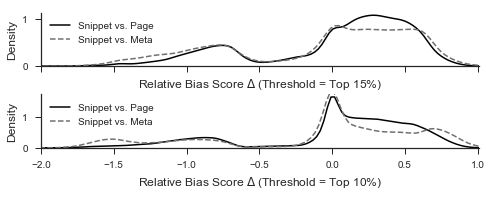

In [89]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
df = df_add_party

df["gap_abs_t1_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t1"], df["allmeta_score_t1"])
df["gap_abs_t2_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t2"], df["allmeta_score_t2"])
df["gap_abs_t3_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t3"], df["allmeta_score_t3"])
df["gap_abs_t4_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t4"], df["allmeta_score_t4"])


# def get_df(df, col, thresh):
#     if thresh=="_t1":
#         df= df[(df["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('bias_amplifying_score_by_meta.pdf', dpi=300)

this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


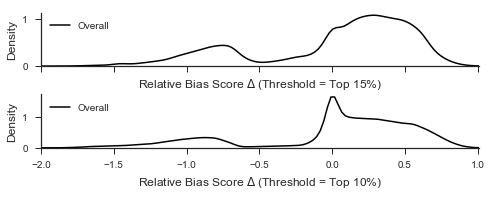

In [96]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
#plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Overall'],loc=2)
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
#plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Overall'],loc=2)
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_overall.pdf', dpi=300)

this is the len of dist:  246645
this is the len of dist:  246645


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  113795
this is the len of dist:  113795


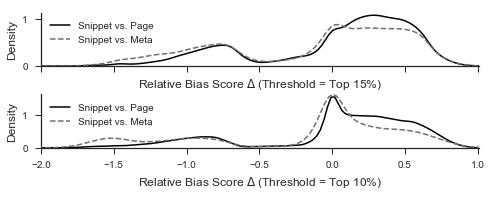

In [90]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
df = df_add_party

df["gap_abs_t1_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t1"], df["allmeta_score_t1"])
df["gap_abs_t2_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t2"], df["allmeta_score_t2"])
df["gap_abs_t3_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t3"], df["allmeta_score_t3"])
df["gap_abs_t4_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t4"], df["allmeta_score_t4"])


# def get_df(df, col, thresh):
#     if thresh=="_t1":
#         df= df[(df["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
    

    
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0) & (df["allmeta_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0) &(df["allmeta_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Snippet vs. Page', "Snippet vs. Meta"], loc=2)
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_meta.pdf', dpi=300)

In [ ]:
['Snippet vs. Page', "Snippet vs. Meta"]

In [ ]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)




In [60]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
df_add_party.columns



Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

this is the len of dist:  258360
this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  126335


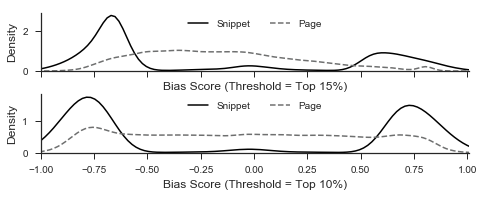

In [61]:

df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
    
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["snip_score_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["visible_text_score_t1"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet', "Page"], loc='center', bbox_to_anchor=(0.5, 0.8), ncol=2)
#ax[0].legend(['Left_leaning', "Right_leaning"], loc="upper left")
ax[0].set_xlabel('Bias Score (Threshold = Top 15%)',size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-1,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df["snip_score_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["visible_text_score_t2"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
#ax[1].legend(['Left_leaning', "Right_leaning"])
ax[1].legend(['Snippet', "Page"], loc='center', bbox_to_anchor=(0.5, 0.8), ncol=2)
ax[1].set_xlabel('Bias Score (Threshold = Top 10%)',size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-1,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Score Distribution of Snippet and Page Text', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('overall_bias_bias_score_distribution_of_snippet_and_text.pdf', dpi=300)

this is the len of dist:  123481
this is the len of dist:  100834


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  59456
this is the len of dist:  49966


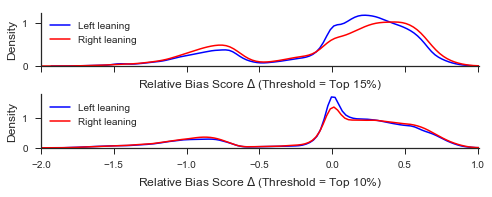

In [92]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"


#path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df[df["party"]=="dem"]["gap_abs_t1"], ax=ax[0], color='b', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[df["party"]=="rep"]["gap_abs_t1"], ax=ax[0], color='r', label="-", linestyle="-", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Left leaning', "Right leaning"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df[df["party"]=="dem"]["gap_abs_t2"], ax=ax[1], color='b', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[df["party"]=="rep"]["gap_abs_t2"], ax=ax[1], color='r', label="-", linestyle="-", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Left leaning', "Right leaning"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_general_type.pdf', dpi=300)
#('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)')

In [26]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
df=df_add_party
df_dem = df[df["party"]=="dem"]["gap_abs_t1"].tolist()
print(len(df_dem))
df_rep = df[df["party"]=="rep"]["gap_abs_t1"].tolist()
print(len(df_rep))

df_dem_positive = df[(df["party"]=="dem") & (df["gap_abs_t1"]>0)]["gap_abs_t1"].tolist()
print(len(df_dem_positive))
df_rep_positive = df[(df["party"]=="rep") & (df["gap_abs_t1"]>0)]["gap_abs_t1"].tolist()

print(len(df_rep_positive))
from scipy import stats
print("all range", stats.ks_2samp(df_rep, df_dem))
print("\n\n")
print("only for the  positive", stats.ks_2samp(df_dem_positive, df_rep_positive))



123481
100834
83763
64134
all range Ks_2sampResult(statistic=0.05551037716569729, pvalue=3.852863775542281e-149)



only for the  positive Ks_2sampResult(statistic=0.10441319426528817, pvalue=0.0)


this is the len of dist:  215331
this is the len of dist:  43029


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  106793
this is the len of dist:  19542


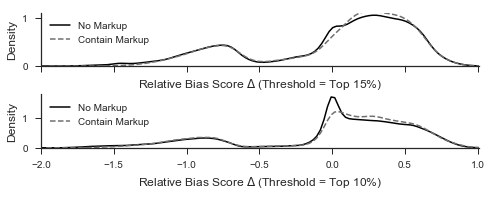

In [93]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"


#path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
   
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df[pd.isnull(df["Markup_Category"])]["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[~pd.isnull(df["Markup_Category"])]["gap_abs_t1"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['No Markup', "Contain Markup"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df[pd.isnull(df["Markup_Category"])]["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[~pd.isnull(df["Markup_Category"])]["gap_abs_t2"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['No Markup', "Contain Markup"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_markup.pdf', dpi=300)

In [ ]:
df[pd.isnull(df["Markup_Category"])]["gap_abs_t1"]

31
Index(['Unnamed: 0', 'Unnamed: 0.1', 'root_topic', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_text_same',
       'new_root_topic'],
      dtype='object')
31
Index(['Unnamed: 0', 'Unnamed: 0.1', 'root_topic', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_text_same',
       'new_root_topic'],
      dtype='object')
df_t1 after:  30
df_t1 after:  30
df_t1 after:  Index(['Amplify', 'Unchanged', 'Decrease', 'Flip'], dtype='object')
                  Amplify  Unchanged  Decrease      Flip
new_root_topic                                          
Pregnancy        0.575355   0.160190  0.043602  0.220853
American         0.529865   0.214644  0.054721  0.200771
Cabinet          0.558232   0.086770  0.044540  0.310459
Candidates       0.584961   0.128983  0.043296  0.242760
Debt             0.623331   0.173535  0.035984  0.167150
Discrimination   0.590099   0.270627  0.037624  0.101650
Econ. Concerns   0.524042   0.156479  0.053790

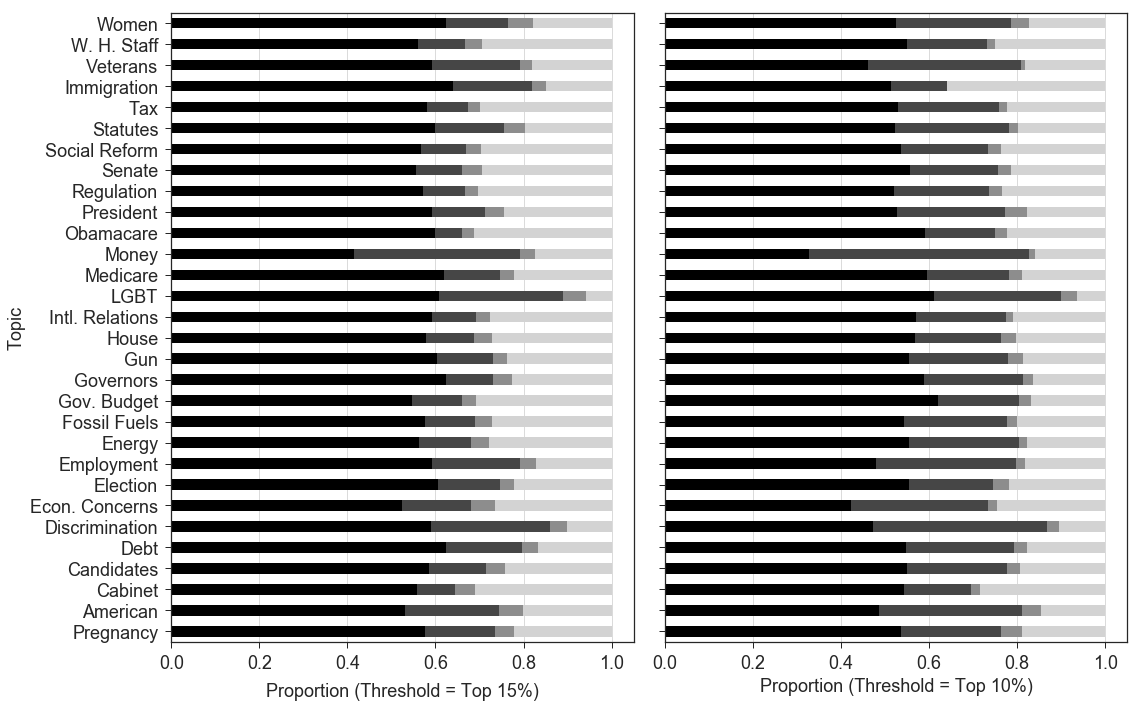

In [328]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_no_party_t1.csv")

df_t2 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_no_party_t2.csv")
print(len(df_t1))
print(df_t1.columns)
print(len(df_t2))

print(df_t2.columns)

df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]

print("df_t1 after: ",len(df_t1))
df_t1.set_index('new_root_topic',inplace=True)
df_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip','pro_snip_text_same':'Unchanged'}, inplace=True)
df_t1= df_t1[['Amplify', 'Unchanged', 'Decrease', 'Flip']]
print("df_t1 after: ",len(df_t1))
print("df_t1 after: ",df_t1.columns)
print(df_t1)

df_t2 = df_t2[(pd.notnull(df_t2["root_topic"])) & (df_t2["root_topic"]!="Null")]
df_t2.set_index('new_root_topic',inplace=True)
df_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip','pro_snip_text_same':'Unchanged'}, inplace=True)
df_t2= df_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]


print("df_t2 after: ",len(df_t2))
print("df_t2 after: ",df_t2.columns)
print(df_t2)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16,10))


from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap1=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax1 = plt.figure(figsize=(10, 6)).add_subplot(121)
df_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap1)


#ax1.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=4)
#ax[0].legend(loc='center right', bbox_to_anchor=(1.0, 1.02), ncol=4,fontsize=14)
#t = ax[0].set_xlabel('Proportion (Threshold = Top 15%)',size=12, labelpad=5)
ax[0].set_xlabel('Proportion (Threshold = Top 15%)',size=18, labelpad=10)
ax[0].set_ylabel('Topic',size=18, labelpad=5)

plt.setp(ax[0].get_yticklabels(), size=18, horizontalalignment='right')
plt.setp(ax[0].get_xticklabels(), size=18,visible=True) 
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_t2.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)


#ax[1].legend(loc='center right', bbox_to_anchor=(1.0, 1.02), ncol=4,fontsize=14)
ax[1].set_xlabel('Proportion (Threshold = Top 10%)',size=18, labelpad=5)


ax[1].set_ylabel(' ',size=2, labelpad=5)
plt.setp(ax[1].get_yticklabels(), visible=False)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_xticklabels(), size=18,visible=True) 
plt.setp(ax[1].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=6.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_effect_type_by_topic_and_no_party_leaning_type_top_10_and_top_15.pdf', dpi=300)

In [293]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)

In [4]:
import pandas as pd
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)

df_type = df_add_topic
print(df_type.columns)



Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

# Amplifying Type Perc By Topics

In [293]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/r-plot/amplifying_type_percent_by_topic_t1.csv")
print(df_t1.columns)
print(len(df_t1))

Index(['Unnamed: 0', 'root_topic', 'party', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_meta_am',
       'pro_snip_meta_de', 'pro_snip_meta_fl'],
      dtype='object')
53


In [291]:
df_t1.head()

,Unnamed: 0,root_topic,party,pro_snip_text_am,pro_snip_text_de,pro_snip_text_fl,pro_snip_meta_am,pro_snip_meta_de,pro_snip_meta_fl
0,1,Abortion,dem,0.617747,0.064846,0.317406,0.460751,0.136519,0.402730
1,2,Abortion,rep,0.675347,0.131944,0.192708,0.668403,0.059028,0.272569
2,3,Act,dem,0.668936,0.105817,0.225248,0.607054,0.129950,0.262995
3,4,Act,rep,0.673575,0.067358,0.259067,0.642487,0.108808,0.248705
4,5,American,dem,0.659642,0.109589,0.230769,0.601686,0.124341,0.273973


In [387]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/r-plot/amplifying_type_percent_by_topic_t1.csv")
print(len(df_t1))
print(pd.isnull(df_t1["root_topic"].iloc[52]))
for i in range(len(df_t1)):
    if pd.isnull(df_t1["root_topic"].iloc[i]):
        print("this is :",i)
df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]
print(len(df_t1))
df2= df_t1[df_t1.duplicated(subset ="root_topic", keep=False)]
print(len(df2))
r = list(range(int(len(df2)/2)))
print(r)


53
True
this is : 51
this is : 52
49
44
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


original len 56
False
after filtering  54
number of root query that have two sides, should be ou shu:  48
Index(['new_root_topic', 'Amplify', 'Decrease', 'Flip', 'Unchanged'], dtype='object')
                  Amplify  Unchanged  Decrease      Flip
new_root_topic                                          
Pregnancy        0.619883   0.064327  0.046784  0.269006
American         0.576561   0.181352  0.046193  0.195894
Candidates       0.591186   0.135444  0.042684  0.230686
Debt             0.630167   0.181291  0.039884  0.148658
Econ. Concerns   0.490234   0.199219  0.050781  0.259766
Election         0.617148   0.136672  0.031409  0.214771
Employment       0.586679   0.225957  0.033302  0.154062
Energy           0.586885   0.163934  0.042623  0.206557
Fossil Fuels     0.614925   0.152239  0.058209  0.174627
Gov. Budget      0.529976   0.103118  0.031175  0.335731
Governors        0.644172   0.096115  0.049761  0.209952
Gun              0.592635   0.135411  0.033994  0.237960
House     

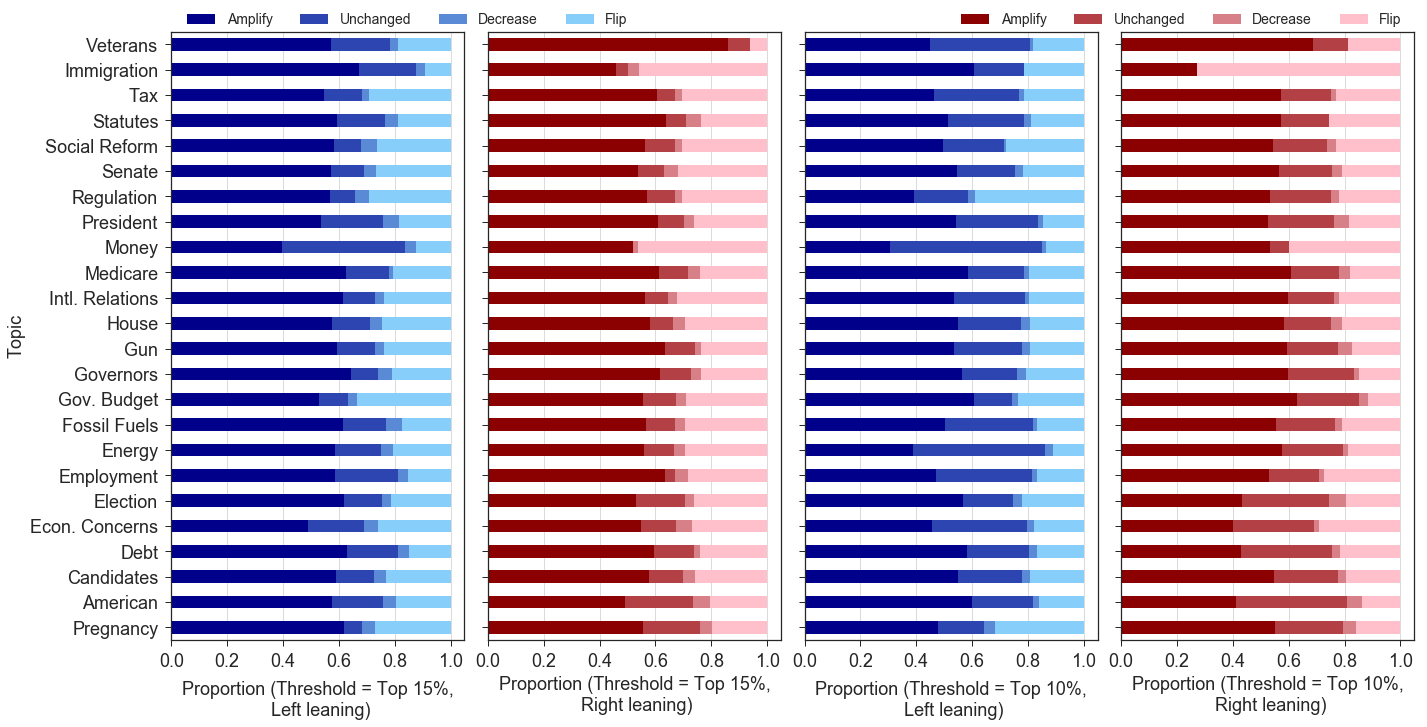

In [158]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_t1.csv")
print("original len", len(df_t1))
print(pd.isnull(df_t1["root_topic"].iloc[52]))
for i in range(len(df_t1)):
    if pd.isnull(df_t1["root_topic"].iloc[i]):
        print("this is containing null root topic :",i)
df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]
print("after filtering ", len(df_t1))
df2= df_t1[df_t1.duplicated(subset ="root_topic", keep=False)]
df_dem_t1 = df2[df2["party"]=="dem"]
print("number of root query that have two sides, should be ou shu: ", len(df2))
df_dem_t1 = df_dem_t1[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl", "pro_snip_text_same"]]
df_dem_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip', "pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_dem_t1.columns)
df_dem_t1.set_index('new_root_topic',inplace=True)
df_dem_t1= df_dem_t1[['Amplify', 'Unchanged','Decrease', 'Flip']]

print(df_dem_t1)
# df.plot.barh(stacked=True)


df_rep_t1 = df2[df2["party"]=="rep"]
print(len(df2))
df_rep_t1 = df_rep_t1[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_rep_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_rep_t1.columns)
df_rep_t1.set_index('new_root_topic',inplace=True)
df_rep_t1= df_rep_t1[['Amplify', 'Unchanged','Decrease', 'Flip']]



df_t10 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_t2.csv")
print("original len", len(df_t10))
print(pd.isnull(df_t10["root_topic"].iloc[52]))
for i in range(len(df_t10)):
    if pd.isnull(df_t10["root_topic"].iloc[i]):
        print("this is containing null root topic :",i)
df_t10 = df_t10[(pd.notnull(df_t10["root_topic"])) & (df_t10["root_topic"]!="Null")]
print("after filtering ", len(df_t10))
df20= df_t10[df_t10.duplicated(subset ="root_topic", keep=False)]
df_dem_t2 = df20[df20["party"]=="dem"]
print("number of root query that have two sides, should be ou shu: ", len(df20))
df_dem_t2 = df_dem_t2[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_dem_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)


print(df_dem_t2.columns)
df_dem_t2.set_index('new_root_topic',inplace=True)
df_dem_t2= df_dem_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]

print(df_dem_t2)
# df.plot.barh(stacked=True)


df_rep_t2 = df20[df20["party"]=="rep"]
print(len(df20))
df_rep_t2 = df_rep_t2[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_rep_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_rep_t2.columns)
df_rep_t2.set_index('new_root_topic',inplace=True)
df_rep_t2= df_rep_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]



fig, ax = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20,10))


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkblue', 'lightskyblue']
v = list(range(len(c)))
l = list(zip(v,c))
cmap1=LinearSegmentedColormap.from_list('rg',l, N=256)

df_dem_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap1)



#ax1.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=4)
ax[0].legend(loc='center right', bbox_to_anchor=(1.6, 1.02), ncol=4,fontsize=14)
ax[0].set_xlabel('Proportion (Threshold = Top 15%,\n Left leaning)',size=18, labelpad=10)
ax[0].set_ylabel('Topic',size=18, labelpad=5)
plt.setp(ax[0].get_xticklabels(), size=18,visible=True) # plt.setp(ax[1].get_xticklabels(), size=18,visible=True) 
plt.setp(ax[0].get_yticklabels(), size=18, horizontalalignment='right')
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkred', 'pink']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_rep_t1.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)



#ax[1].legend(loc='center right', bbox_to_anchor=(0.75, 1.02), ncol=3)
ax[1].set_xlabel('Proportion (Threshold = Top 15%,\n Right leaning)',size=18, labelpad=5)
ax[1].set_ylabel(' ',size=2, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_yticklabels(), visible=False)
plt.setp(ax[1].get_xticklabels(), size=18,visible=True)
#plt.setp(ax[1].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=6.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query), Threshold = Top 15%", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)



df_dem_t2.plot(ax=ax[2], kind='barh', legend=False, stacked=True,colormap=cmap1)

ax[2].set_xlabel('Proportion (Threshold = Top 10%,\n Left leaning)',size=18, labelpad=10)
ax[2].set_ylabel(' ',size=2, labelpad=5)
#plt.setp(ax[2].get_xticklabels(), visible=True)
plt.setp(ax[2].get_xticklabels(), size=18,visible=True)
plt.setp(ax[2].get_yticklabels(), visible=False)
#plt.setp(ax[2].get_yticklabels(), rotation=40, horizontalalignment='right')
ax[2].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkred', 'pink']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_rep_t2.plot(ax=ax[3], kind='barh', legend=False, stacked=True,colormap=cmap2)



ax[3].legend(loc='center right', bbox_to_anchor=(1.0, 1.02), fontsize =14, ncol=4)
ax[3].set_xlabel('Proportion (Threshold = Top 10%,\n Right leaning)',size=18, labelpad=5)
ax[3].set_ylabel('  ',size=2, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[3].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[3].get_yticklabels(), visible=False)
plt.setp(ax[3].get_xticklabels(), size=18,visible=True)
#plt.setp(ax[3].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.08, hspace=6.6)



fig.savefig('bias_effect_type_by_topic_and_leaning_type_top_15_and_top_10.pdf', dpi=300)



In [216]:

path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_topic = pd.read_csv(path_add_party_and_topic)

In [258]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic

this is snippet mean for t1: -0.21859003717416606
this is text mean for t1: -0.1524081264875176
Spearmans Correlation
0.504084167767217 0.0
len of df ori:  258360
len of df sample: 

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


 5167
this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)


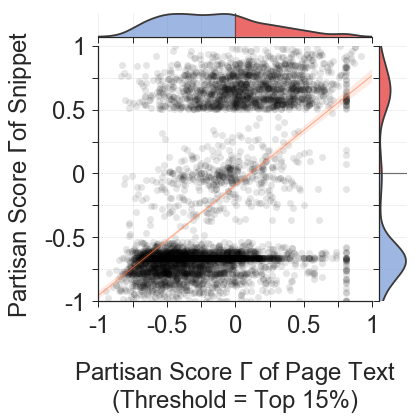

In [86]:
joint_kws = {
    'scatter_kws':{
        'alpha': 0.1,
        'facecolor': 'black', 
        'edgecolor': 'black',
#         's': ((allscores["rep_p"] + allscores["dem_p"]) * 40000).values
    },
    'line_kws':{
        'alpha': 0.7,
        'color': 'coral',
        'linewidth':0.9
    }
}
marginal_kws = {
    'hist':False,
    'kde_kws':{
        'shade':True, 
        'color':'gray',
        'alpha':0.3
    }
}

def bias_kde_ax(ax, axis='x'):
    # Extract coordinates
    if axis=='x':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        print("this is ax.legend: ",ax.legend())
        print("THIS IS AX:", ax)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='x', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    elif axis=='y':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = y >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = y <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axhline(y=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='y', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return ax

def jointplot_correlation(x, y, data, xlim=(-1,1), ylim=(-1,1), ax=''):
    if ax:
        g = sns.jointplot(x, y, data, 
                      kind='reg', xlim=xlim, ylim=ylim, 
                      ratio=8, space=0, stat_func=None,
                      joint_kws=joint_kws,
                      marginal_kws=marginal_kws, 
                      ax=ax)
    else:
        g = sns.jointplot(x, y, data, 
                          kind='reg', xlim=xlim, ylim=ylim, 
                          ratio=8, space=0, stat_func=None,
                          joint_kws=joint_kws,
                          marginal_kws=marginal_kws)
    g.ax_joint.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return g

import scipy.stats as st
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
#path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)

#df_add_party = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df_add_party = df_add_party[(df_add_party["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]
df_add_party = df_add_party[(pd.notnull(df_add_party["visible_text_score_t1"])) & (pd.notnull(df_add_party["snip_score_t1"]))]
print("this is snippet mean for t1:", np.mean(df_add_party["snip_score_t1"].tolist()))
print("this is text mean for t1:", np.mean(df_add_party["visible_text_score_t1"].tolist()))
rho, p = st.spearmanr(df_add_party["visible_text_score_t1"], df_add_party["snip_score_t1"])
print('Spearmans Correlation')
print(rho, p)

print("len of df ori: ", len(df_add_party))

df_add_party_sample = df_add_party.sample(frac=0.02)
print("len of df sample: ", len(df_add_party_sample))

# Config plots

sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 24



g = jointplot_correlation("visible_text_score_t1", "snip_score_t1", df_add_party_sample)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel(('Partisan Score ' +  r'$\Gamma$'+'of Snippet'), size=font_size, labelpad=10)
g.ax_joint.set_xlabel(('Partisan Score '+ r'$\Gamma$'+' of Page Text\n(Threshold = Top 15%)'), size=font_size, labelpad=20)

#plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 15%)',
      #      y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t1_correlation.pdf', dpi=300)

#$\gamma$




this is snippet mean for t2: -0.06260349221646688
this is text mean for t2: -0.05724389936388018
Spearmans Correlation
0.6280152512224104 0.0
before,  126335
sample:  6317


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)


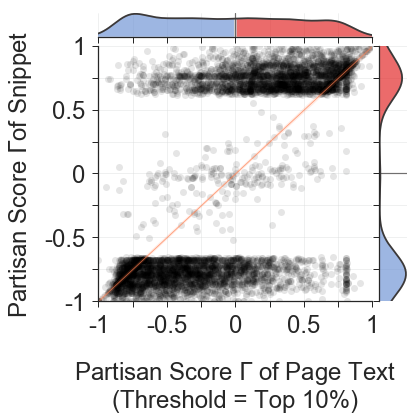

In [85]:

path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"


df_add_party = pd.read_csv(path_add_party)
df_add_party_t2 = df_add_party[(df_add_party["visible_text_score_t2"]!=0) & (df_add_party["snip_score_t2"]!=0)]
df_add_party_t2 = df_add_party_t2[(pd.notnull(df_add_party_t2["visible_text_score_t2"])) & (pd.notnull(df_add_party_t2["snip_score_t2"]))]
# Config plots

print("this is snippet mean for t2:", np.mean(df_add_party_t2["snip_score_t2"].tolist()))
print("this is text mean for t2:", np.mean(df_add_party_t2["visible_text_score_t2"].tolist()))




rho, p = st.spearmanr(df_add_party_t2["visible_text_score_t2"], df_add_party_t2["snip_score_t2"])
print('Spearmans Correlation')
print(rho, p)


sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 24
print("before, ", len(df_add_party_t2))

df_add_party_sample_t2 = df_add_party_t2.sample(frac=0.05)
print("sample: ", len(df_add_party_sample_t2))


g = jointplot_correlation("visible_text_score_t2", "snip_score_t2", df_add_party_sample_t2)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel(('Partisan Score ' +  r'$\Gamma$'+'of Snippet'), size=font_size, labelpad=10)
g.ax_joint.set_xlabel(('Partisan Score '+ r'$\Gamma$'+' of Page Text\n(Threshold = Top 10%)'), size=font_size, labelpad=20)

#plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 10%)',
 #           y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t2_correlation.pdf', dpi=300)



In [597]:
df_type = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_bias_score_add_topic_amplifying_type.csv")
df_type.columns

Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'gap_abs_t1', 'gap_abs_t2', 'gap_abs_t3', 'gap_abs_t4',
       'root', 'tar

len of ori: 258360
len of no-markup: 215331
len t1, should be same: 204005
0.6575132962427391
0.10074753069777702
0.24173917305948384
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.657513  0.100748  0.241739
Snippt Over Meta   0.556040  0.131649  0.312311


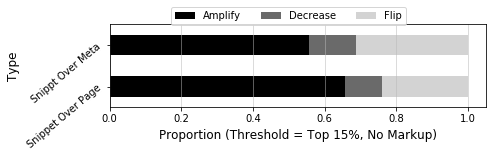

In [21]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print("len of ori:", len(df_type))
df_type = df_type[pd.isnull(df_type["Markup_Category"])]
print("len of no-markup:", len(df_type))


df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1, should be same:", len(df_type_t1))
pro_snip_page_am = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})
#df_plot

from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot.set_index('type',inplace=True)
print(df_plot)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)


#df_plot= df_plot[['Amplify', 'Decrease', 'Flip']]

# bars = ax2.patches
# hatches2 = ''.join(h*len(df_rep) for h in '\* ')

# for bar, hatch in zip(bars, hatches2):
#     bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 15%, No Markup)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)
#print(s)
#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect \n Over Page and Meta Text (No Markup, Threshold = Top 15%)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)


len of ori: 258360
len of no-markup: 43029
len t1, should be same: 42640
0.6849906191369606
0.08142589118198874
0.23358348968105067
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.684991  0.081426  0.233583
Snippt Over Meta   0.590150  0.085999  0.323851


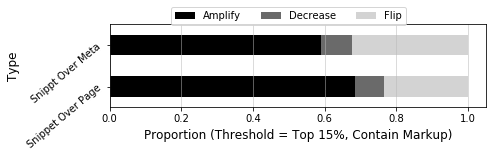

In [22]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print("len of ori:", len(df_type))
df_type = df_type[~pd.isnull(df_type["Markup_Category"])]
print("len of no-markup:", len(df_type))


df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1, should be same:", len(df_type_t1))
pro_snip_page_am = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})
#df_plot

from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot.set_index('type',inplace=True)
print(df_plot)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)


#df_plot= df_plot[['Amplify', 'Decrease', 'Flip']]

# bars = ax2.patches
# hatches2 = ''.join(h*len(df_rep) for h in '\* ')

# for bar, hatch in zip(bars, hatches2):
#     bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 15%, Contain Markup)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)
#print(s)
#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page and Meta Text (Include Markup, Threshold = Top 15%)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)



len t1: 246645
0.662263577206106
0.09740720468689817
0.2403292181069959
1.0
len t2: 113795
0.6668746429983743
0.1422733863526517
0.19085197064897402
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.684991  0.081426  0.233583
Snippt Over Meta   0.590150  0.085999  0.323851
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.666875  0.142273  0.190852
Snippt Over Meta   0.500962  0.235028  0.264010


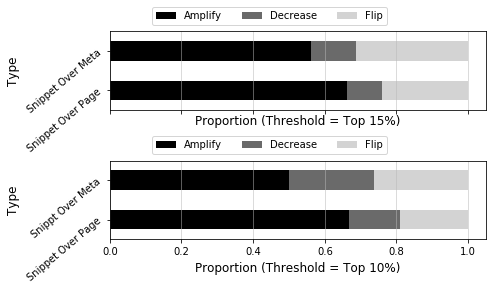

In [52]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic

df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1:", len(df_type_t1))
pro_snip_page_am_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am_t1)
print(pro_snip_page_de_t1)
print(pro_snip_page_fl_t1)
print(pro_snip_page_fl_t1+pro_snip_page_de_t1+pro_snip_page_am_t1)
pro_snip_meta_am_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot_t1 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippet Over Meta"],
    "Amplify":[pro_snip_page_am_t1, pro_snip_meta_am_t1],
    "Decrease":[pro_snip_page_de_t1, pro_snip_meta_de_t1],
    "Flip":[pro_snip_page_fl_t1, pro_snip_meta_fl_t1]
    
})
#df_plot


df_type_t2 = df_type[(df_type["visible_text_score_t2"]!=0) & (df_type["snip_score_t2"]!=0)& (df_type["allmeta_score_t2"]!=0)]
print("len t2:", len(df_type_t2))
pro_snip_page_am = len(df_type_t2[df_type_t2["snip_text_type_t2"]==1])/len(df_type_t2)
pro_snip_page_de = len(df_type_t2[df_type_t2["snip_text_type_t2"]==2])/len(df_type_t2)
pro_snip_page_fl = len(df_type_t2[df_type_t2["snip_text_type_t2"]==3])/len(df_type_t2)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==1])/len(df_type_t2)
pro_snip_meta_de = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==2])/len(df_type_t2)
pro_snip_meta_fl = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==3])/len(df_type_t2)

df_plot_t2 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})



from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(7,4))
df_plot_t1.set_index('type',inplace=True)
print(df_plot)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap2)




ax[0].legend(loc='center right', bbox_to_anchor=(0.75, 1.2), ncol=3)
ax[0].set_xlabel('Proportion (Threshold = Top 15%)',size=12, labelpad=5)
ax[0].set_ylabel('Type',size=12, labelpad=5)

#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.setp(ax[0].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)


df_plot_t2.set_index('type',inplace=True)
print(df_plot_t2)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot_t2.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)





ax[1].legend(loc='center right', bbox_to_anchor=(0.75, 1.2), ncol=3)
ax[1].set_xlabel('Proportion (Threshold = Top 10%)',size=12, labelpad=5)
ax[1].set_ylabel('Type',size=12, labelpad=5)

#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_10_date_10_26.pdf', dpi=300)






len t2: 78263
0.6584592974969015
0.13486577309839898
0.20667492940469953
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.658459  0.134866  0.206675
Snippt Over Meta   0.504836  0.225304  0.269859
Text(0.5,17.2469,'Proportion (Threshold = Top 10%)')


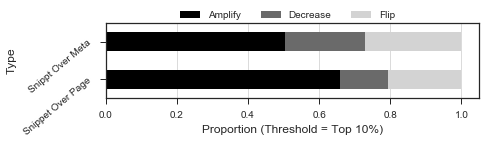

In [672]:
df_type_t2 = df_type[(df_type["visible_text_score_t2"]!=0) & (df_type["snip_score_t2"]!=0)& (df_type["allmeta_score_t2"]!=0)]
print("len t2:", len(df_type_t2))
pro_snip_page_am = len(df_type_t2[df_type_t2["snip_text_type_t2"]==1])/len(df_type_t2)
pro_snip_page_de = len(df_type_t2[df_type_t2["snip_text_type_t2"]==2])/len(df_type_t2)
pro_snip_page_fl = len(df_type_t2[df_type_t2["snip_text_type_t2"]==3])/len(df_type_t2)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==1])/len(df_type_t2)
pro_snip_meta_de = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==2])/len(df_type_t2)
pro_snip_meta_fl = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==3])/len(df_type_t2)

df_plot_2 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})
#df_plot

from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot_2.set_index('type',inplace=True)
print(df_plot_2)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot_2.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)





ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 10%)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)
print(s)
#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
fig.savefig('overall_effect_of_snip_over_meta_and_page_top_10_date_10_26.pdf', dpi=300)



# Bias Score Gap Distribution

# Load data

In [177]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root_party.csv"

path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_bias_score_add_topic_filter_t1.csv"
df_add_party = pd.read_csv(path_add_party)
df_add_topic = pd.read_csv(path_add_party_and_topic)

In [3]:
df_add_party.head()

,Unnamed: 0,cmpt_rank_str,crawl_id,directions_str,meta_description,orient_str,qry,result_id,serp_id,serp_id_y,...,gap_visible_t4,gap_all_t4,domain_name,gap_abs_t1,gap_abs_t2,gap_abs_t3,gap_abs_t4,root,target,party
0,13,0.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,AT&T CUSTOMERS! AT&T is now adding additional ...,NaN,regulatory cost recovery charge,670f57cd09bc0610422fb24e65e17e4ebb59debcbdafbf...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,0.934180,0.934180,billpolice.com,0.378778,-0.591883,-0.596976,-0.934180,regulatory cost,regulatory cost recovery charge,rep
1,14,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,b15a7672eaa2fbdff739f3c44aab0ec6127b9f9c01c6fd...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,0.934180,0.934180,wireless.att.com,0.200470,-0.314256,-0.863268,-0.934180,regulatory cost,regulatory cost recovery charge,rep
2,15,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,Solved: I have four phones on my account and t...,NaN,regulatory cost recovery charge,a8f04c6612febc7b80d4d57527c489cd22a81b942dffa7...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,0.975545,0.975545,forums.att.com,-0.232384,-0.867706,-0.867706,-0.975545,regulatory cost,regulatory cost recovery charge,rep
3,16,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,4c8149ee80b31708c4d752f4d46dc93f422469799a8f8f...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,0.934180,0.934180,wireless.att.com,0.201395,-0.370081,-0.863268,-0.934180,regulatory cost,regulatory cost recovery charge,rep
4,17,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,What is a universal service fund fee or a gros...,NaN,regulatory cost recovery charge,d443967c9da32414ec02ec1a51b65b32b39e6e6949e729...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,0.640907,0.640907,time.com,-0.180456,-0.054256,-0.416900,-0.640907,regulatory cost,regulatory cost recovery charge,rep


In [4]:
df_add_topic.head()

,Unnamed: 0,cmpt_rank_str,crawl_id,directions_str,meta_description,orient_str,qry,result_id,serp_id,serp_id_y,...,domain_name,gap_abs_t1,gap_abs_t2,gap_abs_t3,gap_abs_t4,root,target,party,root_type,root_topic
0,13,0.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,AT&T CUSTOMERS! AT&T is now adding additional ...,NaN,regulatory cost recovery charge,670f57cd09bc0610422fb24e65e17e4ebb59debcbdafbf...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,billpolice.com,0.378778,-0.591883,-0.596976,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
1,14,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,b15a7672eaa2fbdff739f3c44aab0ec6127b9f9c01c6fd...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,wireless.att.com,0.200470,-0.314256,-0.863268,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
2,16,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,4c8149ee80b31708c4d752f4d46dc93f422469799a8f8f...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,wireless.att.com,0.201395,-0.370081,-0.863268,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
3,23,0.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,AT&T CUSTOMERS! AT&T is now adding additional ...,NaN,regulatory cost recovery fee,2cb5f2c17149a8fb9f1d0007e9d383ac2ed0f0da7317d3...,51258746519c90d911cb061a3a066d6d70894630d482e1...,51258746519c90d911cb061a3a066d6d70894630d482e1...,...,billpolice.com,0.399170,-0.583173,-0.596976,-0.93418,regulatory cost,regulatory cost recovery fee,rep,vote_smart,Regulation
4,24,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery fee,2e9204c3e095147f7ffae10abfee7a7c1daa642e816f91...,51258746519c90d911cb061a3a066d6d70894630d482e1...,51258746519c90d911cb061a3a066d6d70894630d482e1...,...,wireless.att.com,0.207596,-0.278983,-0.841261,-0.93418,regulatory cost,regulatory cost recovery fee,rep,vote_smart,Regulation


In [170]:
df_add_topic.columns

Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'gap_abs_t1', 'gap_abs_t2', 'gap_abs_t3', 'gap_abs_t4',
       'root', 'tar

# Linear relationship between snippet and text 

In [178]:
joint_kws = {
    'scatter_kws':{
        'alpha': 0.01,
        'facecolor': 'black', 
        'edgecolor': 'black',
#         's': ((allscores["rep_p"] + allscores["dem_p"]) * 40000).values
    },
    'line_kws':{
        'alpha': 0.7,
        'color': 'coral',
        'linewidth':0.9
    }
}
marginal_kws = {
    'hist':False,
    'kde_kws':{
        'shade':True, 
        'color':'gray',
        'alpha':0.3
    }
}

def bias_kde_ax(ax, axis='x'):
    # Extract coordinates
    if axis=='x':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        print("this is ax.legend: ",ax.legend())
        print("THIS IS AX:", ax)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='x', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    elif axis=='y':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = y >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = y <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axhline(y=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='y', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return ax

def jointplot_correlation(x, y, data, xlim=(-1,1), ylim=(-1,1), ax=''):
    if ax:
        g = sns.jointplot(x, y, data, 
                      kind='reg', xlim=xlim, ylim=ylim, 
                      ratio=8, space=0, stat_func=None,
                      joint_kws=joint_kws,
                      marginal_kws=marginal_kws, 
                      ax=ax)
    else:
        g = sns.jointplot(x, y, data, 
                          kind='reg', xlim=xlim, ylim=ylim, 
                          ratio=8, space=0, stat_func=None,
                          joint_kws=joint_kws,
                          marginal_kws=marginal_kws)
    g.ax_joint.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return g

import scipy.stats as st
#df_add_party = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df_add_party = df_add_party[(df_add_party["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]
df_add_party = df_add_party[(pd.notnull(df_add_party["visible_text_score_t1"])) & (pd.notnull(df_add_party["snip_score_t1"]))]
# Config plots
sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 28



g = jointplot_correlation("visible_text_score_t1", "snip_score_t1", df_add_party)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel('Bias Score of Snippet', size=font_size, labelpad=10)
g.ax_joint.set_xlabel('Bias Score of Non_Meta Text', size=font_size, labelpad=20)

plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 15%)',
            y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t1_correlation_10_24.pdf', dpi=300)

rho, p = st.spearmanr(df_add_party["visible_text_score_t1"], df_add_party["snip_score_t1"])
print('Spearmans Correlation')
print(rho, p)



/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)
Spearmans Correlation
0.47749693333807913 0.0


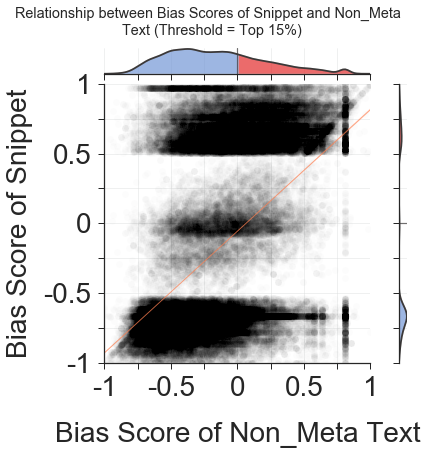

In [179]:
g = jointplot_correlation("visible_text_score_t1", "snip_score_t1", df_add_party)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel('Bias Score of Snippet', size=font_size, labelpad=10)
g.ax_joint.set_xlabel('Bias Score of Non_Meta Text', size=font_size, labelpad=20)

plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 15%)',
            y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t1_correlation_10_24.pdf', dpi=300)

rho, p = st.spearmanr(df_add_party["visible_text_score_t1"], df_add_party["snip_score_t1"])
print('Spearmans Correlation')
print(rho, p)

# correelation t2

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)
Spearmans Correlation
0.5748038178987855 0.0


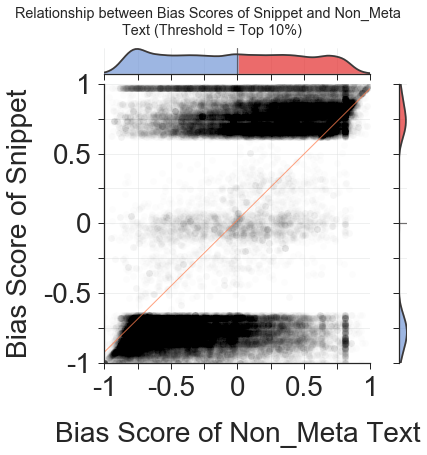

In [183]:
#df_add_party = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df_add_party_t2 = df_add_party[(df_add_party["visible_text_score_t2"]!=0) & (df_add_party["snip_score_t2"]!=0)]
df_add_party_t2 = df_add_party_t2[(pd.notnull(df_add_party_t2["visible_text_score_t2"])) & (pd.notnull(df_add_party_t2["snip_score_t2"]))]
# Config plots
sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 28


g = jointplot_correlation("visible_text_score_t2", "snip_score_t2", df_add_party_t2)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel('Bias Score of Snippet', size=font_size, labelpad=10)
g.ax_joint.set_xlabel('Bias Score of Non_Meta Text', size=font_size, labelpad=20)

plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 10%)',
            y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t2_correlation_10_24.pdf', dpi=300)

rho, p = st.spearmanr(df_add_party_t2["visible_text_score_t2"], df_add_party_t2["snip_score_t2"])
print('Spearmans Correlation')
print(rho, p)

# # correelation t3

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)
Spearmans Correlation
0.6232120864660723 0.0


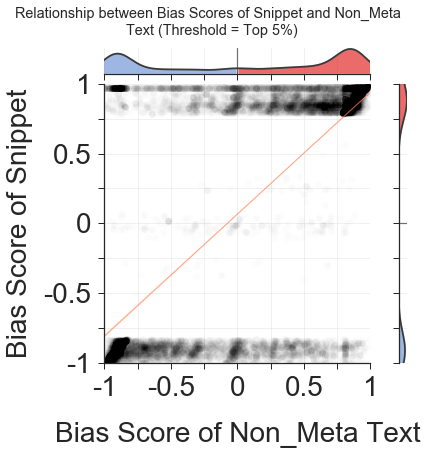

In [185]:
#df_add_party = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df_add_party_t3 = df_add_party[(df_add_party["visible_text_score_t3"]!=0) & (df_add_party["snip_score_t3"]!=0)]
df_add_party_t3 = df_add_party_t3[(pd.notnull(df_add_party_t2["visible_text_score_t3"])) & (pd.notnull(df_add_party_t3["snip_score_t3"]))]
# Config plots
sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 28


g = jointplot_correlation("visible_text_score_t3", "snip_score_t3", df_add_party_t3)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel('Bias Score of Snippet', size=font_size, labelpad=10)
g.ax_joint.set_xlabel('Bias Score of Non_Meta Text', size=font_size, labelpad=20)

plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 5%)',
            y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t3_correlation_10_24.pdf', dpi=300)

rho, p = st.spearmanr(df_add_party_t3["visible_text_score_t3"], df_add_party_t3["snip_score_t3"])
print('Spearmans Correlation')
print(rho, p)

In [261]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root_party.csv"

path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_bias_score_add_topic_filter_t1.csv"
df_add_party = pd.read_csv(path_add_party)
df_add_topic = pd.read_csv(path_add_party_and_topic)

# Bias Score of Snippet/Non_meta Text V.S. Topic

Root:  Welfare_and_Health
this is the len of dist:  1811
this is the len of dist:  1811
Root: Abortion
this is the len of dist:  869
this is the len of dist:  869
Root: Act
this is the len of dist:  1809
this is the len of dist:  1809
Root: American
this is the len of dist:  1400
this is the len of dist:  1400
Root: Candidates
this is the len of dist:  90020
this is the len of dist:  90020


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Root: Debt
this is the len of dist:  1235
this is the len of dist:  1235
Root: Election
this is the len of dist:  847
this is the len of dist:  847
Root: Employment 
this is the len of dist:  2167
this is the len of dist:  2167
Root: Energy
this is the len of dist:  1000
this is the len of dist:  1000
Root: Fossil Fuel
this is the len of dist:  2221
this is the len of dist:  2221
Root: Governors
this is the len of dist:  3204
this is the len of dist:  3204
Root: Gun
this is the len of dist:  1798
this is the len of dist:  1798
Root: House
this is the len of dist:  18706
this is the len of dist:  18706
Root: International Relationship
this is the len of dist:  2097
this is the len of dist:  2097
Root: Lgbt
this is the len of dist:  308
this is the len of dist:  308
Root: Medicare
this is the len of dist:  934
this is the len of dist:  934
Root: Money
this is the len of dist:  59
this is the len of dist:  59
Root: Null
this is the len of dist:  4134
this is the len of dist:  4134
Root: O

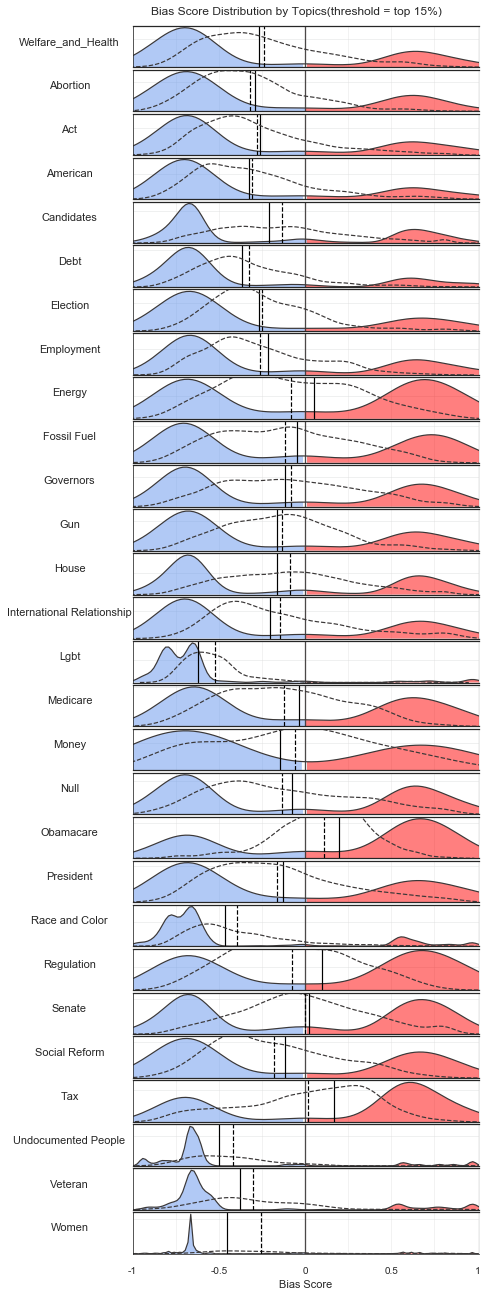

In [262]:
df = df_add_topic
# def get_df(df, col, thresh):
#     if thresh=="_t1":
#         df= df[(df["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.2, label=label)
    
    if shade:
        # Extract coordinates
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')
    
    # Style
    ax.set(xlim=(-1,1))#, ylim=(0,max(y)))
    # for spine in ['top', 'right']:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
    ax.legend().remove()
    ax.tick_params(axis='x')
    ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
    ax.set_xticklabels(['-1', '', '-0.5', '', '0', '', '0.5', '', '1'])
    ax.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    return ax



fig, ax = plt.subplots(nrows=df.root_topic.nunique(), ncols=1, sharex=True, figsize=(7,18))
idx = 0
for root_topic, _df in df.groupby('root_topic'):
    #print("\n\n")
    print('Root: {}'.format(root_topic))
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
    for thresh in [('snip_score_t1','-'), ('visible_text_score_t1','--')]:#, ('_t3', '-.')]:
        shade = True if thresh[0] == 'snip_score_t1' else False
        #print("len of df:", len(df))
        df = df_add_topic
        #df= df[(df["visible_text_score"+thresh[0]]!=0) & (df["snip_score"+thresh[0]]!=0)]
        #print("len of df after:", len(df))
        col =  thresh[0]
        #df_col = get_df(df, col, thresh)
        plot_bias_distribution(_df[col], ax=ax[idx], label=thresh[1], linestyle=thresh[1], shade=shade)
        ax[idx].axvline(_df['snip_score_t1'].mean(), linestyle='-', color='k', linewidth=1.2) if thresh[0] == 'snip_score_t1' else ax[idx].axvline(_df['visible_text_score_t1'].mean(), linestyle='--', color='k', linewidth=1.2)
#         ax[idx].set_title(root_group)
                     
#         ax[idx].axvline(results[results.root==root]['score'].mean(), linestyle='-', color='k', linewidth=0.8)
        sns.despine(ax=ax[idx], right=False, bottom=False, top=False)
        ax[idx].spines['left'].set_linewidth(0.75)  
        ax[idx].set(xlim=(-1,1.01))
        ax[idx].set_ylabel(root_topic.strip(), rotation=0, labelpad=50)
        ax[idx].tick_params(left=False, bottom=False)
        ax[idx].yaxis.set_ticklabels([])
        ax[idx].grid(b=True, axis='x', which='major', color='#DDDEDE', linewidth=0.5)
            
    idx += 1
    
    if idx == 27:
        ax[idx].spines['bottom'].set_visible(True)
        ax[idx].spines['bottom'].set_linewidth(0.75)
        ax[idx].tick_params(bottom='off')
        ax[idx].set_xlabel('Bias Score')
fig.suptitle('Bias Score Distribution by Topics(threshold = top 15%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('t1_snip_text_bias_by_topic_10_24.pdf', dpi=300)
    

# Meta's bias V.S. Topic

In [270]:
df_add_topic = pd.read_csv(path_add_party_and_topic)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Gap Score')

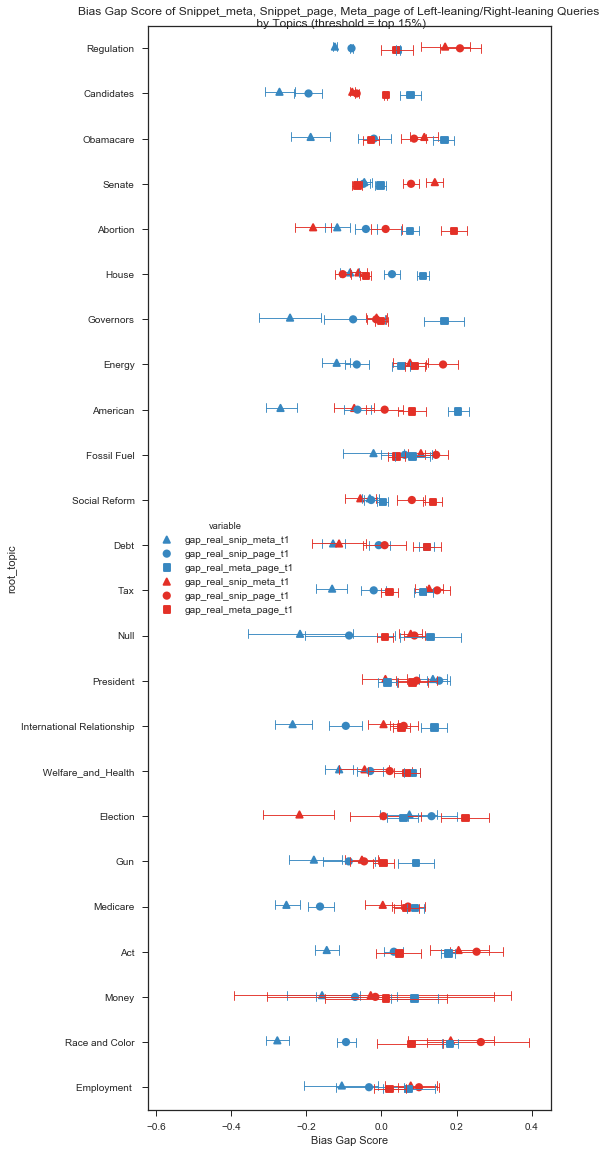

In [274]:

#df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_real_snip_page_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
df_add_topic["gap_real_meta_page_t1"] = df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t1', 
                                                'gap_real_snip_page_t1',"gap_real_meta_page_t1"]) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Gap Score of Snippet_meta, Snippet_page, Meta_page of Left-leaning/Right-leaning Queries \n by Topics (threshold = top 15%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t1_bias_gap_score_meta_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Gap Score')


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Gap Score')

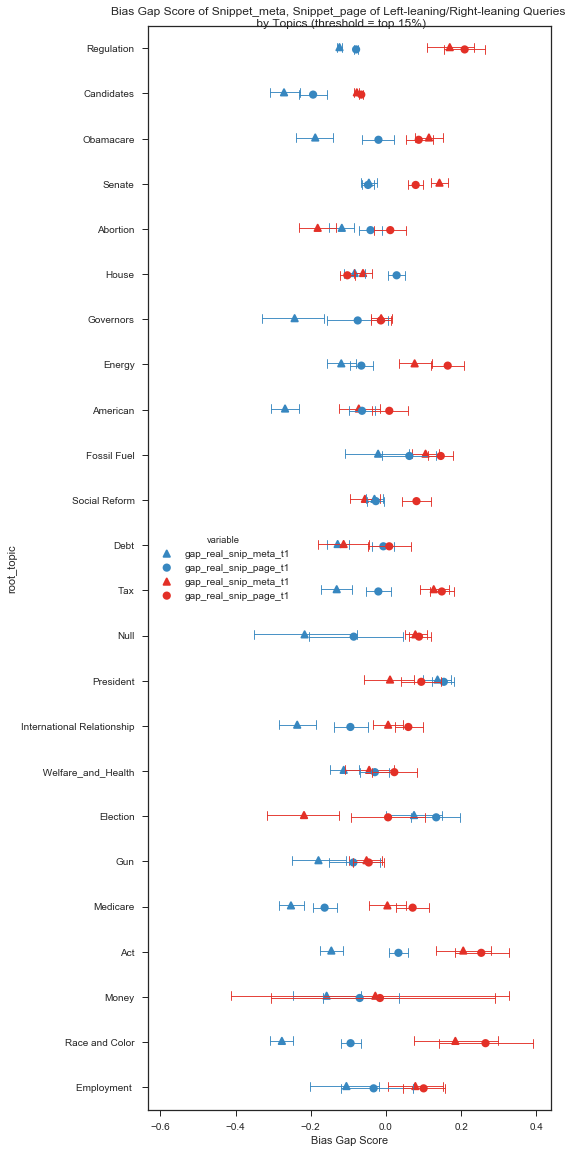

In [278]:

df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_real_snip_page_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
#df_add_topic["gap_real_meta_page_t1"] = df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t1', 
                                                'gap_real_snip_page_t1']) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Gap Score of Snippet_meta, Snippet_page of Left-leaning/Right-leaning Queries \n by Topics (threshold = top 15%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t1_bias_gap_score_no_meta_page_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Gap Score')




# t2

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  88496
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Gap Score')

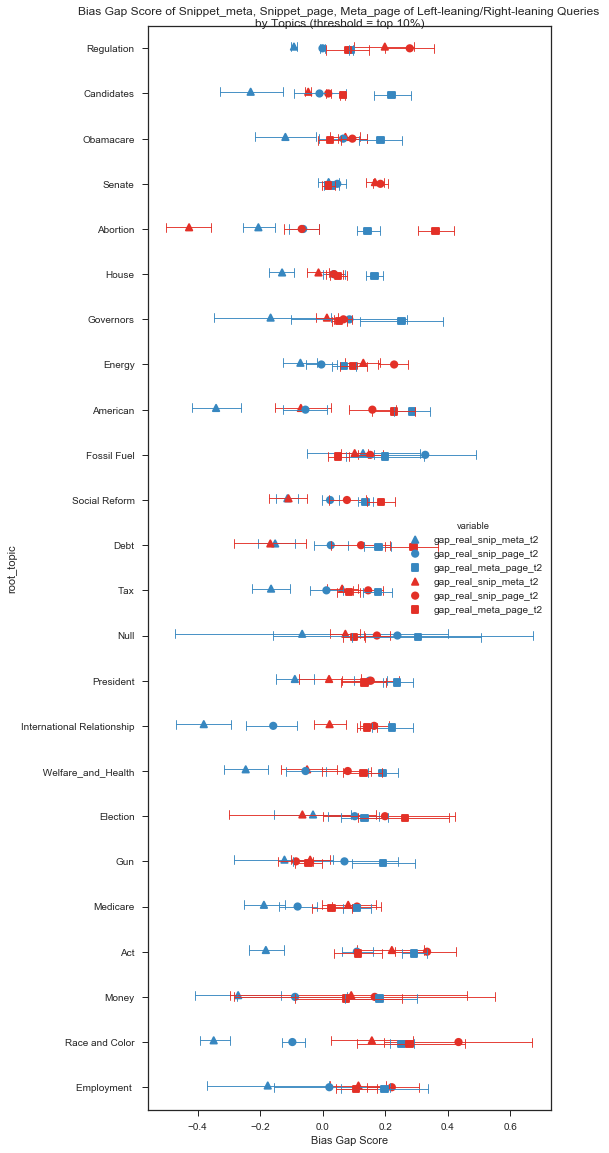

In [279]:

df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t2"]!=0) & (df_add_topic["snip_score_t2"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t2"] = df_add_topic["snip_score_t2"]-df_add_topic["allmeta_score_t2"]
df_add_topic["gap_real_snip_page_t2"] = df_add_topic["snip_score_t2"]-df_add_topic["visible_text_score_t2"]
df_add_topic["gap_real_meta_page_t2"] = df_add_topic["allmeta_score_t2"]-df_add_topic["visible_text_score_t2"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t2', 
                                                'gap_real_snip_page_t2',"gap_real_meta_page_t2"]) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Gap Score of Snippet_meta, Snippet_page, Meta_page of Left-leaning/Right-leaning Queries \nby Topics (threshold = top 10%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t2_bias_gap_score_meta_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Gap Score')



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  88496
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Gap Score')

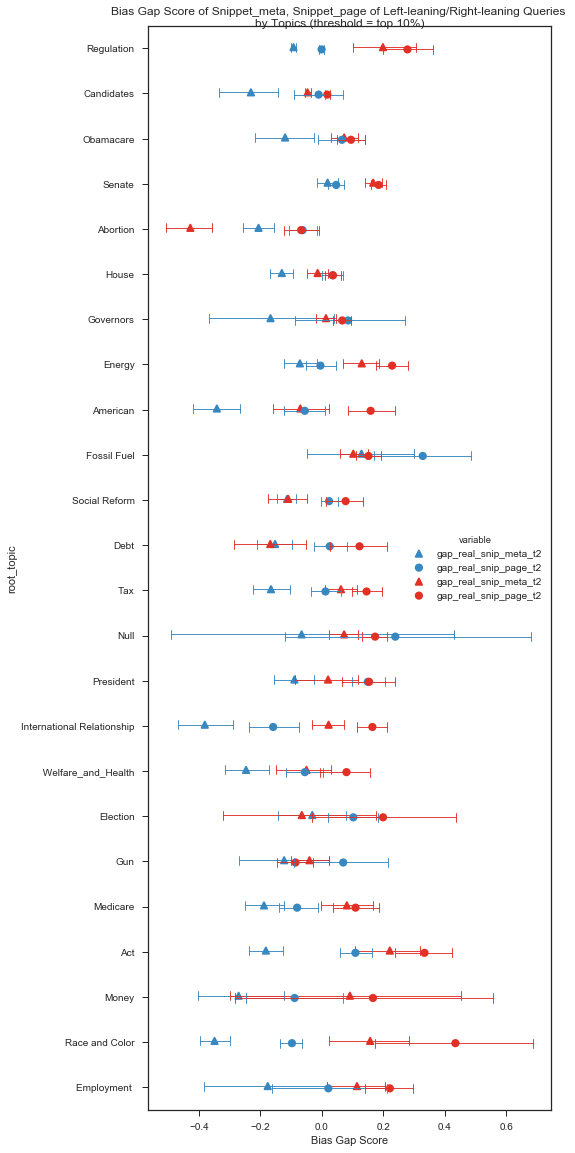

In [281]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t2"]!=0) & (df_add_topic["snip_score_t2"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t2"] = df_add_topic["snip_score_t2"]-df_add_topic["allmeta_score_t2"]
df_add_topic["gap_real_snip_page_t2"] = df_add_topic["snip_score_t2"]-df_add_topic["visible_text_score_t2"]
#df_add_topic["gap_real_meta_page_t2"] = df_add_topic["allmeta_score_t2"]-df_add_topic["visible_text_score_t2"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t2', 
                                                'gap_real_snip_page_t2']) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Gap Score of Snippet_meta, Snippet_page of Left-leaning/Right-leaning Queries \nby Topics (threshold = top 10%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t2_bias_gap_score_no_meta_page_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Gap Score')

# Meta's amplifying score by topics

In [282]:
df_add_topic = pd.read_csv(path_add_party_and_topic)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Amplifying Score')

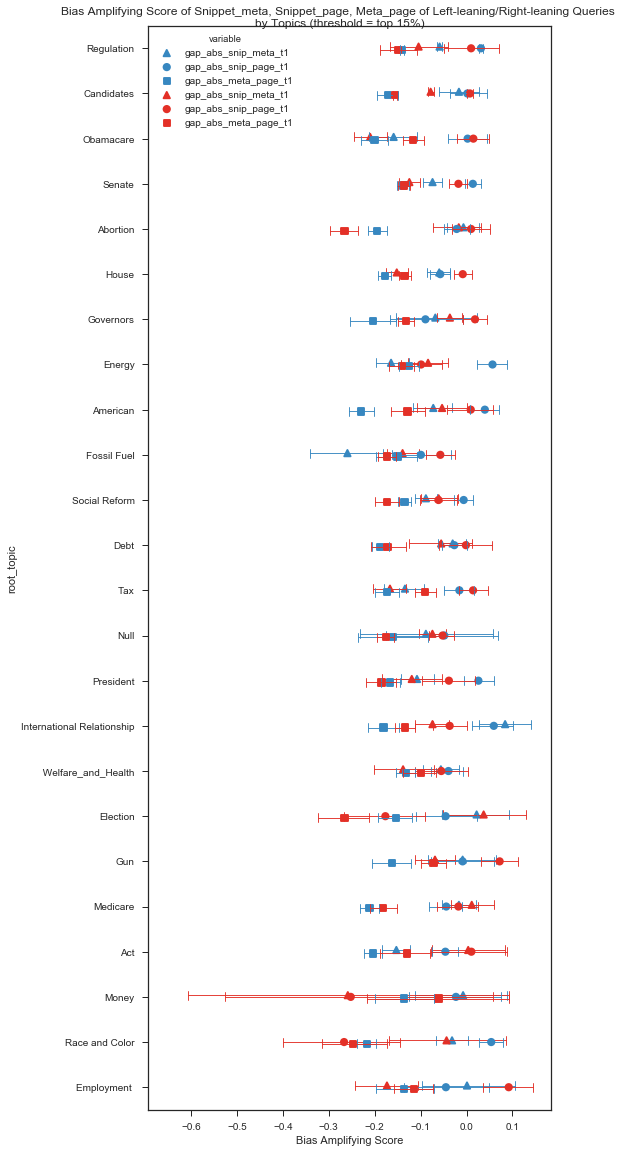

In [283]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t


print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_abs_snip_meta_t1"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t1"], df_add_topic["allmeta_score_t1"])  #df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_abs_snip_page_t1"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t1"], df_add_topic["visible_text_score_t1"])# df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
df_add_topic["gap_abs_meta_page_t1"] = np.vectorize(get_gap_abs)(df_add_topic["allmeta_score_t1"], df_add_topic["visible_text_score_t1"])  #df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_abs_snip_meta_t1', 
                                                'gap_abs_snip_page_t1',"gap_abs_meta_page_t1"]) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Amplifying Score of Snippet_meta, Snippet_page, Meta_page of Left-leaning/Right-leaning Queries \nby Topics (threshold = top 15%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t1_bias_amplifying_score_meta_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Amplifying Score')



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
177746
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Amplifying Score')

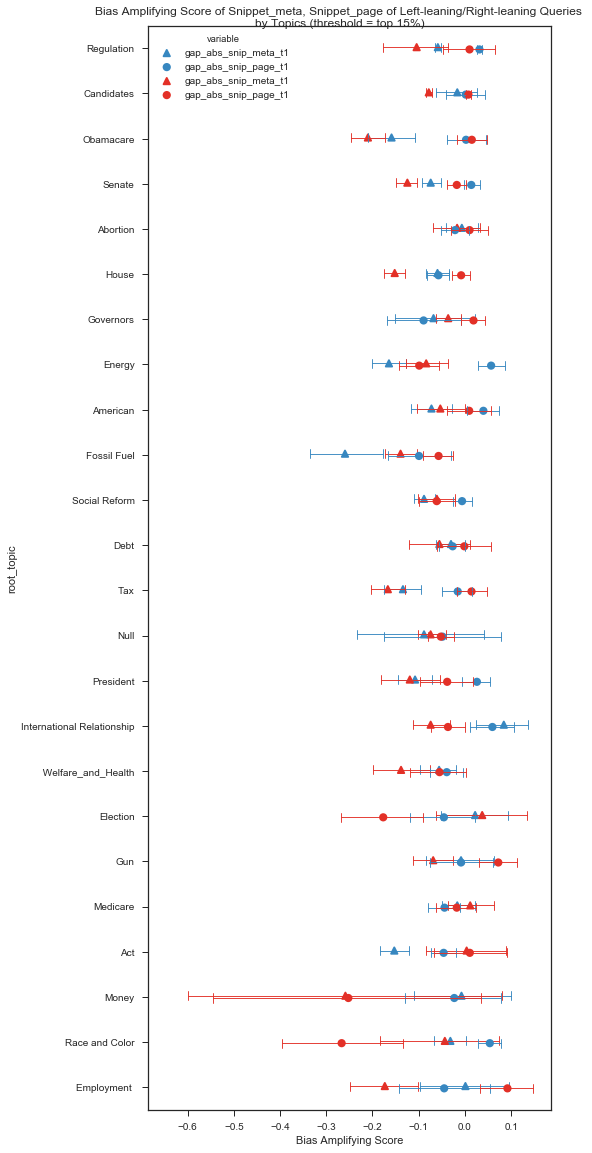

In [284]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t


print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(len(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_abs_snip_meta_t1"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t1"], df_add_topic["allmeta_score_t1"])  #df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_abs_snip_page_t1"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t1"], df_add_topic["visible_text_score_t1"])# df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
#df_add_topic["gap_abs_meta_page_t1"] = np.vectorize(get_gap_abs)(df_add_topic["allmeta_score_t1"], df_add_topic["visible_text_score_t1"])  #df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_abs_snip_meta_t1', 
                                                'gap_abs_snip_page_t1']) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Amplifying Score of Snippet_meta, Snippet_page of Left-leaning/Right-leaning Queries \nby Topics (threshold = top 15%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t1_bias_amplifying_score_no_meta_page_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Amplifying Score')




# t2

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  88496
88496
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Amplifying Score')

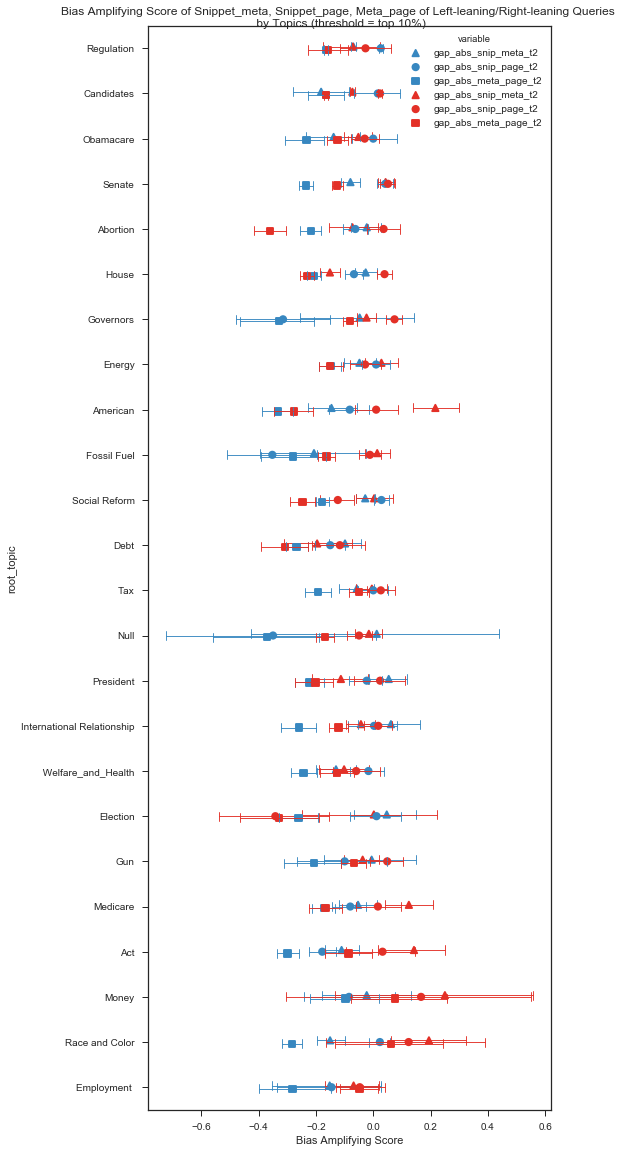

In [285]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t


print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t2"]!=0) & (df_add_topic["snip_score_t2"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(len(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_abs_snip_meta_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["allmeta_score_t2"])  #df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_abs_snip_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["visible_text_score_t2"])# df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
df_add_topic["gap_abs_meta_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["allmeta_score_t2"], df_add_topic["visible_text_score_t2"])  #df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_abs_snip_meta_t2', 
                                                'gap_abs_snip_page_t2',"gap_abs_meta_page_t2"]) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Amplifying Score of Snippet_meta, Snippet_page, Meta_page of Left-leaning/Right-leaning Queries \n by Topics (threshold = top 10%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t2_bias_amplifying_score_meta_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Amplifying Score')




<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  88496
88496
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,22.8194,'Bias Amplifying Score')

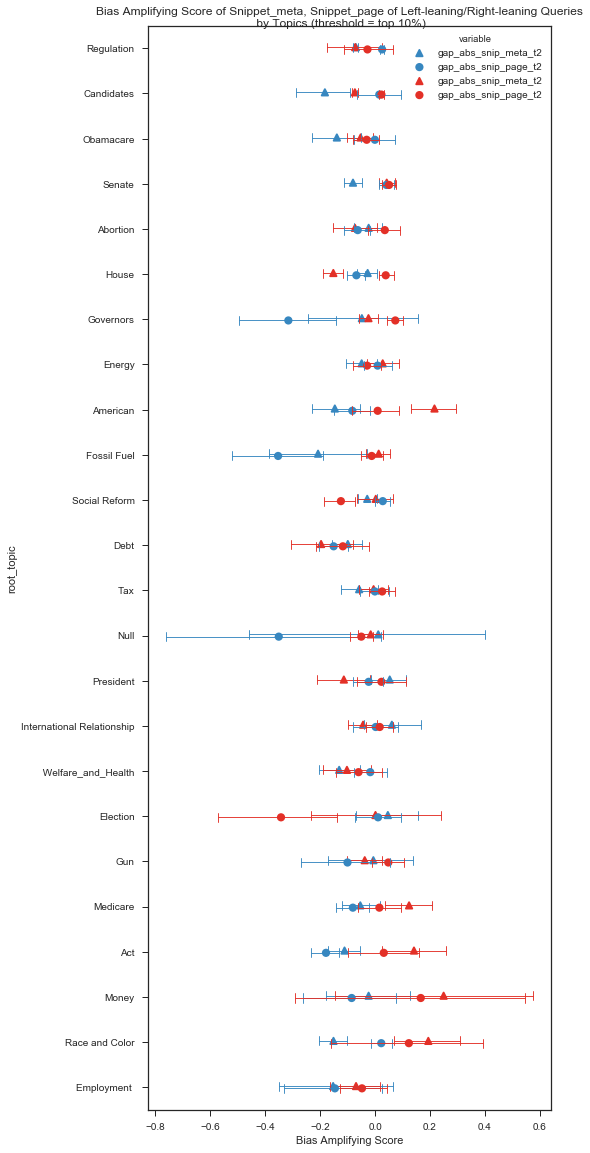

In [287]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t


print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t2"]!=0) & (df_add_topic["snip_score_t2"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(len(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_abs_snip_meta_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["allmeta_score_t2"])  #df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_abs_snip_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["visible_text_score_t2"])# df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
#df_add_topic["gap_abs_meta_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["allmeta_score_t2"], df_add_topic["visible_text_score_t2"])  #df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_abs_snip_meta_t2', 
                                                'gap_abs_snip_page_t2']) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,16))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))

fig.suptitle('Bias Amplifying Score of Snippet_meta, Snippet_page of Left-leaning/Right-leaning Queries\n by Topics (threshold = top 10%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
fig.savefig('t2_bias_amplifying_score_no_meta_page_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Amplifying Score')





<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  88496
88496
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,154,'Bias Amplifying Score')

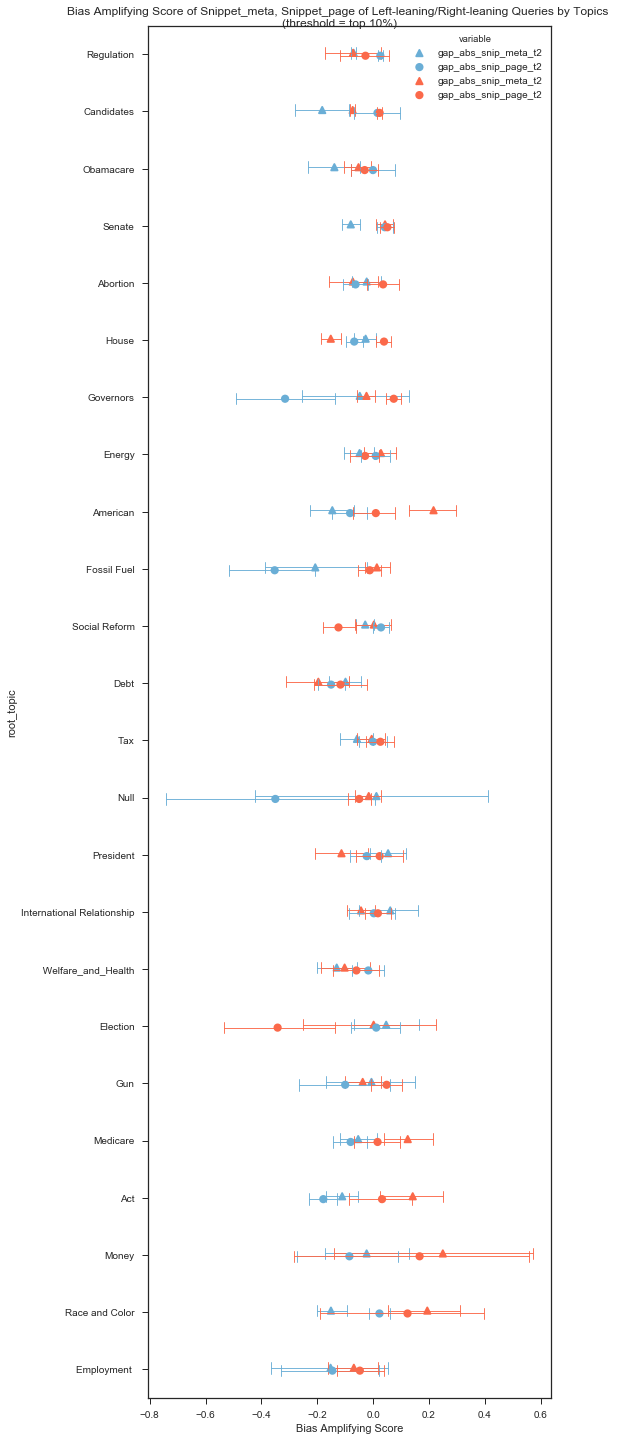

In [259]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t


print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t2"]!=0) & (df_add_topic["snip_score_t2"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(len(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_abs_snip_meta_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["allmeta_score_t2"])  #df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_abs_snip_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["snip_score_t2"], df_add_topic["visible_text_score_t2"])# df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
#df_add_topic["gap_abs_meta_page_t2"] = np.vectorize(get_gap_abs)(df_add_topic["allmeta_score_t2"], df_add_topic["visible_text_score_t2"])  #df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_abs_snip_meta_t2', 
                                                'gap_abs_snip_page_t2']) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,20))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds', n_colors=1))

fig.suptitle('Bias Amplifying Score of Snippet_meta, Snippet_page of Left-leaning/Right-leaning Queries by Topics \n(threshold = top 10%)', fontsize=12, x=.6, y=1)
fig.tight_layout(h_pad=-0.4)
#fig.savefig('t2_bias_amplifying_score_no_meta_page_by_topic_10_24.pdf', dpi=300)
ax.set_xlabel('Bias Amplifying Score')






Root:  Welfare_and_Health


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Root: Abortion
Root: Act
Root: American
Root: Candidates
Root: Debt
Root: Election
Root: Employment 
Root: Energy
Root: Fossil Fuel
Root: Governors
Root: Gun
Root: House
Root: International Relationship
Root: Lgbt
Root: Medicare
Root: Money
Root: Null
Root: Obamacare
Root: President
Root: Race and Color
Root: Regulation
Root: Senate
Root: Social Reform
Root: Tax
Root: Undocumented People
Root: Veteran
Root: Women


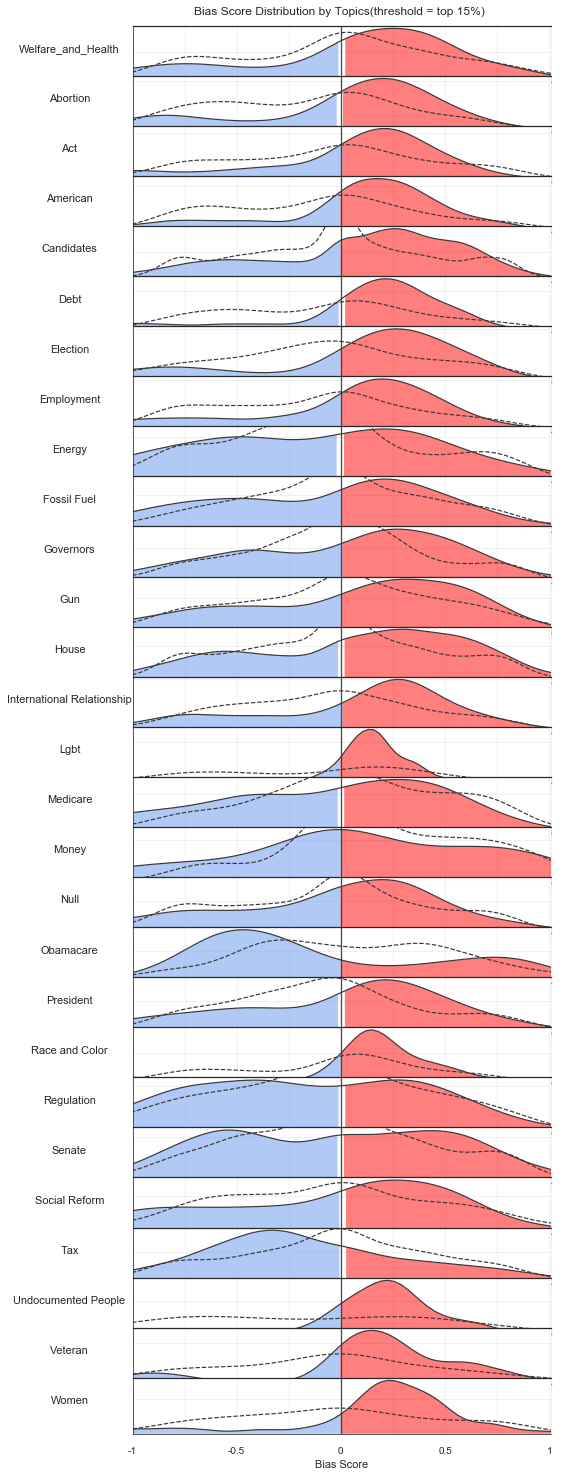

In [187]:
df = df_add_topic
# def get_df(df, col, thresh):
#     if thresh=="_t1":
#         df= df[(df["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.2, label=label)
    
    if shade:
        # Extract coordinates
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')
    
    # Style
    ax.set(xlim=(-1,1))#, ylim=(0,max(y)))
    # for spine in ['top', 'right']:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
    ax.legend().remove()
    ax.tick_params(axis='x')
    ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
    ax.set_xticklabels(['-1', '', '-0.5', '', '0', '', '0.5', '', '1'])
    ax.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    return ax



fig, ax = plt.subplots(nrows=df.root_topic.nunique(), ncols=1, sharex=True, figsize=(8,20.5))
idx = 0
for root_topic, _df in df.groupby('root_topic'):
    print('Root: {}'.format(root_topic))
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
    for thresh in [('_t1','-'), ('_t2','--')]:#, ('_t3', '-.')]:
        shade = True if thresh[0] == '_t1' else False
        #print("len of df:", len(df))
        df = df_add_topic
        df= df[(df["visible_text_score"+thresh[0]]!=0) & (df["snip_score"+thresh[0]]!=0)]
        #print("len of df after:", len(df))
        col = 'gap_visible' + thresh[0]
        #df_col = get_df(df, col, thresh)
        plot_bias_distribution(_df[col], ax=ax[idx], label=thresh[1], linestyle=thresh[1], shade=shade)
#         ax[idx].set_title(root_group)
                     
#         ax[idx].axvline(results[results.root==root]['score'].mean(), linestyle='-', color='k', linewidth=0.8)
        sns.despine(ax=ax[idx], right=False, bottom=False, top=False)
        ax[idx].spines['left'].set_linewidth(0.75)  
        ax[idx].set(xlim=(-1,1.01))
        ax[idx].set_ylabel(root_topic.strip(), rotation=0, labelpad=50)
        ax[idx].tick_params(left=False, bottom=False)
        ax[idx].yaxis.set_ticklabels([])
        ax[idx].grid(b=True, axis='x', which='major', color='#DDDEDE', linewidth=0.5)
            
    idx += 1
    
    if idx == 27:
        ax[idx].spines['bottom'].set_visible(True)
        ax[idx].spines['bottom'].set_linewidth(0.75)
        ax[idx].tick_params(bottom='off')
        ax[idx].set_xlabel('Bias Score')
    fig.suptitle('Bias Score Distribution by Topics(threshold = top 15%)', fontsize=12, x=.6, y=1)
    fig.tight_layout(h_pad=-1.5)


    

In [14]:
joint_kws = {
    'scatter_kws':{
        'alpha': 0.2,
        'color': 'whitesmoke', 
        'edgecolor': 'black',
#         's': ((allscores["rep_p"] + allscores["dem_p"]) * 40000).values
    },
    'line_kws':{
        'alpha': 0.7,
        'color': 'coral',
        'linewidth':0.9
    }
}
marginal_kws = {
    'hist':False,
    'kde_kws':{
        'shade':True, 
        'color':'gray',
        'alpha':0.3
    }
}

def bias_kde_ax(ax, axis='x'):
    # Extract coordinates
    if axis=='x':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='x', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    elif axis=='y':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = y >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = y <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axhline(y=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='y', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return ax

def jointplot_correlation(x, y, data, xlim=(-1,1), ylim=(-1,1), ax=''):
    if ax:
        g = sns.jointplot(x, y, data, 
                      kind='reg', xlim=xlim, ylim=ylim, 
                      ratio=8, space=0, stat_func=None,
                      joint_kws=joint_kws,
                      marginal_kws=marginal_kws, 
                      ax=ax)
    else:
        g = sns.jointplot(x, y, data, 
                          kind='reg', xlim=xlim, ylim=ylim, 
                          ratio=8, space=0, stat_func=None,
                          joint_kws=joint_kws,
                          marginal_kws=marginal_kws)
    g.ax_joint.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return g

In [4]:
df = pd.read_csv("third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df = df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
df_every = df[~pd.isnull(df['gap_visible_t1'])]

In [5]:
df_every.head()

,Unnamed: 0,cmpt_rank_str,crawl_id,directions_str,meta_description,orient_str,qry,result_id,serp_id,serp_id_y,serp_rank_str,snippet,subrank_str,title,type_html,url,url_x,visible_text_score_t1,allmeta_score_t1,visible_text_allmeta_score_t1,snip_score_t1,meta_des_score_t1,visible_text_score_t2,allmeta_score_t2,visible_text_allmeta_score_t2,...,visible_text_score_t3,allmeta_score_t3,visible_text_allmeta_score_t3,snip_score_t3,meta_des_score_t3,visible_text_score_t4,allmeta_score_t4,visible_text_allmeta_score_t4,snip_score_t4,meta_des_score_t4,gap_visible_t1,gap_all_t1,gap_visible_t2,gap_all_t2,gap_visible_t3,gap_all_t3,gap_visible_t4,gap_all_t4,domain_name,gap_abs_t1,gap_abs_t2,gap_abs_t3,gap_abs_t4,root,target
3,15,0.0,774b2ccb538cdec253b1cbe9a4599408dc516f0dd8ea391f5d37d15c,NaN,U.S. President Donald Trump on Wednesday nominated a proponent of ...,NaN,coal nuclear bailout,bb0c6caa69cab1ff308a1ccc3c1dff9198c52718c3b9256a1c4a858e,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,3,U.S. President Donald Trump on Wednesday nominated a proponent of ...,3,"Trump nominates coal, nuclear bailout supporter to U.S. power agen...",general,https://www.google.com/search,https://www.reuters.com/article/us-usa-trump-energy-regulator/trum...,0.127186,0.852100,0.341975,0.762934,0.762934,0.125187,0.852100,0.378026,...,0.012700,0.905600,0.418563,0.0,0.0,0.930378,0.930378,0.930378,0.0,0.0,-0.635748,-0.420959,-0.637747,-0.384908,0.012700,0.418563,0.930378,0.930378,reuters.com,0.635748,0.637747,-0.012700,-0.930378,coal nuclear,coal nuclear bailout
7,19,0.0,774b2ccb538cdec253b1cbe9a4599408dc516f0dd8ea391f5d37d15c,NaN,The magnitude and range of these estimates indicate the significan...,NaN,coal nuclear bailout,a05cc56571518eb86379b298c48ae390889011b02d582d119e039d27,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,7,"Proposed coal, nuclear power plant bailout could exceed $34 billio...",7,"API | Proposed coal, nuclear power plant bailout could exceed $34 ...",general,https://www.google.com/search,https://www.api.org/news-policy-and-issues/news/2018/07/19/propose...,0.268372,0.004849,0.196844,0.578242,0.000000,0.586337,0.801822,0.608438,...,0.782838,0.866396,0.791634,0.0,0.0,0.619157,0.921996,0.662420,0.0,0.0,-0.309870,-0.381398,0.586337,0.608438,0.782838,0.791634,0.619157,0.662420,api.org,0.309870,-0.586337,-0.782838,-0.619157,coal nuclear,coal nuclear bailout
8,20,0.0,774b2ccb538cdec253b1cbe9a4599408dc516f0dd8ea391f5d37d15c,NaN,.,NaN,coal nuclear bailout,e55b0770f035b7a18438d5dc3634bf1d101557ad262b6a9444ec6b09,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,d145129580dde99689217527423a7d59f691eecb07b31859b74ab30b,8,Opponents of President Donald Trump's proposed bailout of coal and...,8,Trump reveals how little he knows about his coal and nuclear bailo...,general,https://www.google.com/search,https://thinkprogress.org/trump-reveals-how-little-he-knows-about-...,-0.075636,0.547702,0.065118,0.762934,0.000000,-0.000010,0.547702,0.182561,...,0.236891,0.804964,0.520927,0.0,0.0,-0.967945,0.000000,-0.967945,0.0,0.0,-0.838570,-0.697816,-0.762944,-0.580373,0.236891,0.520927,-0.967945,-0.967945,thinkprogress.org,-0.838570,-0.762944,-0.236891,-0.967945,coal nuclear,coal nuclear bailout
10,22,0.0,774b2ccb538cdec253b1cbe9a4599408dc516f0dd8ea391f5d37d15c,NaN,"Over the past decade, coal has been pushed off the power grid by c...",NaN,coal nuclear trump,57e751c5e4e58cce81e8a04ead1026320ea7dd14898214f592361879,89122a34275544907d72aac0d9331b016546569e44e63de29985210b,89122a34275544907d72aac0d9331b016546569e44e63de29985210b,0,"In 2010, the United States had 580 coal-fired power plants. ... Wh...",0,Trump Wants to Bail Out Coal and Nuclear Power. Here's Why That ...,general,https://www.google.com/search,https://www.nytimes.com/interactive/2018/06/13/climate/coal-nuclea...,-0.341485,0.457080,-0.006603,0.525304,0.000000,-0.296641,0.81774

In [11]:
# Config plots
sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 28

In [16]:
import scipy.stats as st

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/rer/.local/lib/python3.5/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


Spearmans Correlation
0.47231376664645136 0.0


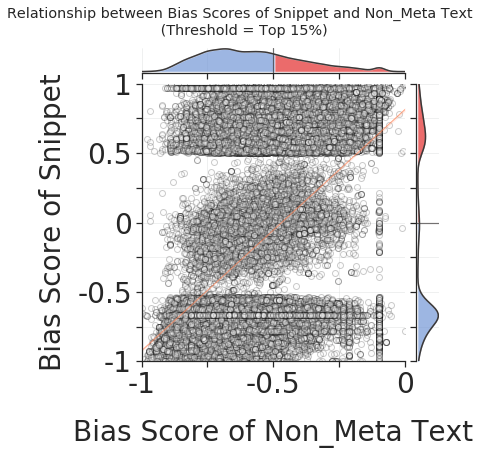

In [21]:
g = jointplot_correlation("visible_text_score_t1", "snip_score_t1", df_every)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel('Bias Score of Snippet', size=font_size, labelpad=10)
g.ax_joint.set_xlabel('Bias Score of Non_Meta Text', size=font_size, labelpad=20)

plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta Text \n (Threshold = Top 15%)',
            y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('new_correlation.png', dpi=300)

rho, p = st.spearmanr(df_every["visible_text_score_t1"], df_every["snip_score_t1"])
print('Spearmans Correlation')
print(rho, p)

---

# Mean Bias by Webpage Text, Snippet Text, Meta Text

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,8.45))
sns.pointplot(y='root', x='value', hue='Bias', order=config.root_order,
              linestyles='',
              scale=1, palette=['coral','lightslategray'], alpha=0.9,
              data=melt_df, dodge=True, kwargs={'edgecolor':'black'})


line_list = [line for line in ax.get_children() if 'Line' in str(type(line))]
for line in line_list:
    line.set_color('#3B3838')
    line.set_linewidth(1.2)

# Points
p = ax.get_children()[0]
p.set_offset_position('data')
coordinates = p.get_offsets()

p = ax.get_children()[0]
p.set_color('whitesmoke')
p.set_edgecolor('black')
p.set_linewidth(0.8)
p.set_alpha(0.9)

p = ax.get_children()[1]
p.set_color('gray')
p.set_edgecolor('black')
p.set_linewidth(0.8)

# Plot lines [2:3] off
# Error bar lines [4:-2]

ax.set_xlim(-0.3, 0.3)
ax.set_title('Average and Weighted Bias by Root Query', fontdict={'size':13})
ax.set(#title = 'Average and Weighted Bias by Root Query',
       xlabel='Bias Score',
       ylabel='Root Query')
ax.axvline(0, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(b=True, axis='both', which='major', color='#DDDEDE', linewidth=0.5)

# Legends
l = ax.legend()
l.set_title('')

fig.tight_layout()
fig.savefig('bias_by_root.pdf')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

from math import log
import pandas as pd
from matplotlib import cm
from  matplotlib.colors import LinearSegmentedColormap

In [123]:
bias_by_text = pd.read_csv("mean_by_topic_t1_dem.csv")
bias_by_text.columns = bias_by_text.columns.str.lower()
print(bias_by_text.shape)
bias_by_text.head()

(5, 8)


,unnamed: 0,root_group,mean_meta,std_meta,mean_non_meta,std_non_meta,mean_snippet,std_snippet
0,1,Governors,-0.107806,0.442543,-0.180152,0.303970,-0.291300,0.637743
1,2,Gun,-0.029817,0.444136,-0.103557,0.345640,-0.123605,0.651388
2,3,House,-0.136677,0.396613,-0.121554,0.354688,-0.136111,0.661025
3,4,Senate,-0.063318,0.400233,-0.081126,0.353315,-0.068571,0.656300
4,5,Tax,-0.046434,0.385232,-0.026841,0.387902,0.156723,0.610364


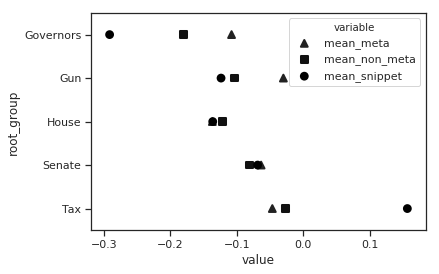

In [102]:
plot_df = bias_by_text.melt(id_vars=['root_group'], 
                            value_vars=['mean_meta', 'mean_non_meta', 'mean_snippet'])#,
                                       #'std_meta', 'std_non_meta', 'std_snippet'])

sns.pointplot(x='value', y='root_group', hue='variable', color='black', data=plot_df, linestyles='', markers=['^','s','o'])

In [115]:
df = pd.read_csv('all_data.csv')

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,2,3,4,5,7,8,9,10,11,12,14,15,16,17,41,46,47,48,49,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
root_mask = df.root_group.isin(['LGBT', 'Gun', 'Tax', 'Obamacare', 'Regulation', 'Senate', 'House', 'Governors'])
df_filtered = df[root_mask]
df_dem = df_filtered[df_filtered.party == 'dem']
df_rep = df_filtered[df_filtered.party == 'rep']

In [ ]:
fig, ax = plt.subplots(nrows=21, ncols=1, sharex=True, figsize=(6,8.5))
table = []
for idx, root in enumerate(root_order):
    df = results[results.root==root]['score']
    table.append({'root':root, 'mean':df.mean(), 'std':df.std()})
#     sns.kdeplot(results[results.root==root]['score'], ax=ax[idx], color='k', linewidth=1, legend=False)
    plot_bias_distribution(results[results.root==root]['score'], ax=ax[idx])
    ax[idx].axvline(results[results.root==root]['score'].mean(), linestyle='-', color='k', linewidth=0.8)
    sns.despine(ax=ax[idx], right='off', bottom='off', top='off')
    ax[idx].spines['left'].set_linewidth(0.75)  
    ax[idx].set(xlim=(-1,1.01))
    ax[idx].set_ylabel(root.strip(), rotation=0, labelpad=50)
    ax[idx].tick_params(left='off', bottom='off')
    ax[idx].yaxis.set_ticklabels([])
    ax[idx].grid(b=True, axis='x', which='major', color='#DDDEDE', linewidth=0.5)
    if idx == 20:
        ax[idx].spines['bottom'].set_visible(True)
        ax[idx].spines['bottom'].set_linewidth(0.75)
        ax[idx].tick_params(bottom='on')
        ax[idx].set_xlabel('Bias Score')
    fig.suptitle('Bias Score Distribution by Root Query', fontsize=13, x=.6, y=1)
    fig.tight_layout(h_pad=-0.9)
fig.savefig('../report/cscw2018/figures/bias_score_distribution_root.pdf')

In [114]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'cmpt_rank_str', 'crawl_id',
       'directions_str', 'meta_description', 'orient_str', 'qry',
       'result_id', 'serp_id', 'serp_id_y', 'serp_rank_str', 'snippet',
       'subrank_str', 'title', 'type_html', 'url', 'url_x',
       'visible_text_score_t1', 'allmeta_score_t1',
       'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2',
       'meta_des_score_t2', 'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3',
       'meta_des_score_t3', 'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4',
       'meta_des_score_t4', 'gap_visible_t1', 'gap_all_t1',
       'gap_visible_t2', 'gap_all_t2', 'gap_visible_t3', 'gap_all_t3',
       'gap_visible_t4', 'gap_all_t4', 'domain_name', 'gap_abs_t1',
       'gap_abs_t2', 'gap_abs_t3', 'ga

In [115]:
for thresh in ['_t1', '_t2', '_t3']:
    snip_score = 'snip_score' + thresh
    page_score = 'visible_text_score' + thresh
    meta_score = 'allmeta_score' + thresh
    
    df['gap_snip_page' + thresh] = df[snip_score] - df[page_score]
    df['gap_snip_meta' + thresh] = df[snip_score] - df[meta_score]
    df['gap_page_meta' + thresh] = df[page_score] - df[meta_score]

In [127]:

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.2, label=label)
    
    if shade:
        # Extract coordinates
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')
    
    # Style
    ax.set(xlim=(-1,1))#, ylim=(0,max(y)))
    # for spine in ['top', 'right']:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
    ax.legend().remove()
    ax.tick_params(axis='x')
    ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
    ax.set_xticklabels(['-1', '', '-0.5', '', '0', '', '0.5', '', '1'])
    ax.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    return ax

Root: American
Root: Governors
Root: Gun
Root: House
Root: LGBT
Root: Obamacare
Root: Regulation
Root: Senate
Root: Tax
Root: candidates


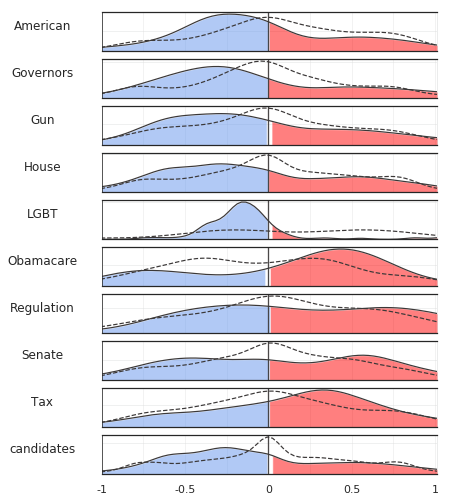

In [145]:
fig, ax = plt.subplots(nrows=df.root_group.nunique(), ncols=1, sharex=True, figsize=(6,8.5))
idx = 0
for root_group, _df in df.groupby('root_group'):
    print('Root: {}'.format(root_group))
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
    for thresh in [('_t1','-'), ('_t2','--')]:#, ('_t3', '-.')]:
        shade = True if thresh[0] == '_t1' else False
        col = 'gap_snip_page' + thresh[0]
        plot_bias_distribution(_df[col], ax=ax[idx], label=thresh[1], linestyle=thresh[1], shade=shade)
#         ax[idx].set_title(root_group)
                     
#         ax[idx].axvline(results[results.root==root]['score'].mean(), linestyle='-', color='k', linewidth=0.8)
        sns.despine(ax=ax[idx], right=False, bottom=False, top=False)
        ax[idx].spines['left'].set_linewidth(0.75)  
        ax[idx].set(xlim=(-1,1.01))
        ax[idx].set_ylabel(root_group.strip(), rotation=0, labelpad=50)
        ax[idx].tick_params(left=False, bottom=False)
        ax[idx].yaxis.set_ticklabels([])
        ax[idx].grid(b=True, axis='x', which='major', color='#DDDEDE', linewidth=0.5)
            
    idx += 1
 

All Roots
Root: American
Root: Governors
Root: Gun
Root: House
Root: LGBT
Root: Obamacare
Root: Regulation
Root: Senate
Root: Tax
Root: candidates


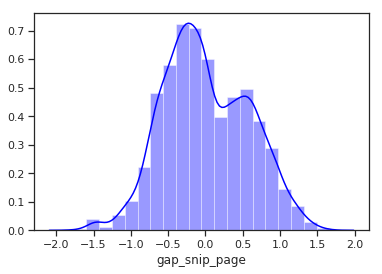

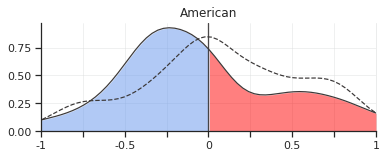

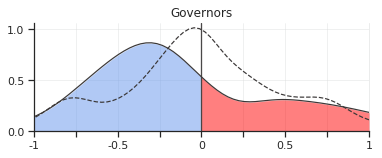

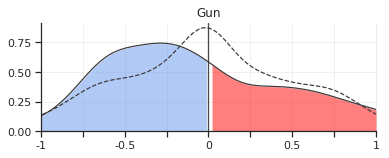

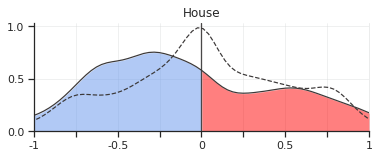

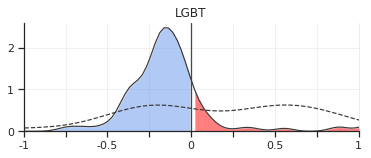

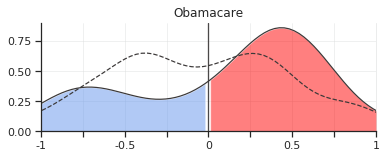

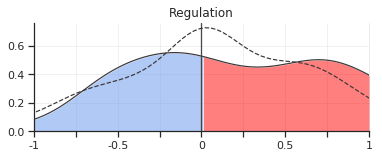

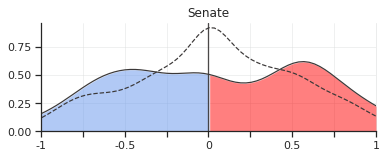

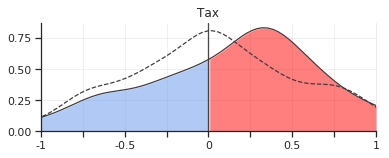

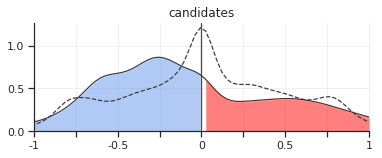

In [136]:
print('All Roots')
sns.distplot(df_dem['gap_snip_page'], color='blue', bins=20)
# sns.distplot(df_dem['visible_text_score_t1'], color='red', bins=20)

for root_group, _df in df.groupby('root_group'):
    print('Root: {}'.format(root_group))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
    for thresh in [('_t1','-'), ('_t2','--')]:#, ('_t3', '-.')]:
        shade = True if thresh[0] == '_t1' else False
        col = 'gap_snip_page' + thresh[0]
        plot_bias_distribution(_df[col], ax=ax, label=thresh[1], linestyle=thresh[1], shade=shade)
        ax.set_title(root_group)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


All Roots
Root: Governors
Root: Gun


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Root: House
Root: LGBT
Root: Senate


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Root: Tax


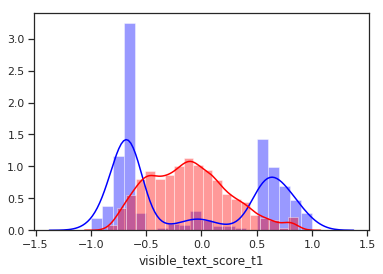

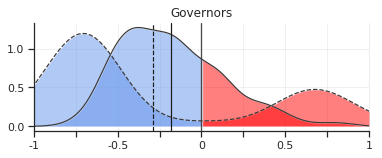

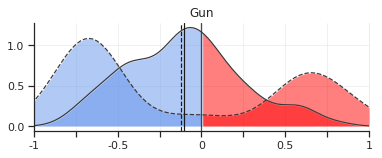

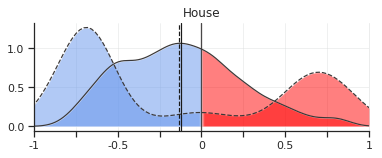

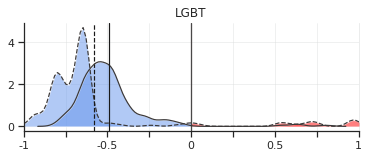

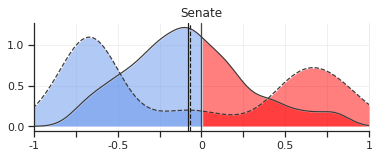

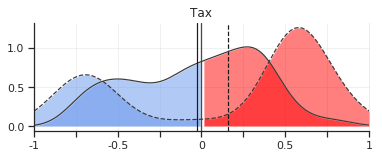

In [153]:
print('All Roots')
sns.distplot(df_dem['snip_score_t1'], color='blue', bins=20)
sns.distplot(df_dem['visible_text_score_t1'], color='red', bins=20)

for idx, _df in df_dem.groupby('root_group'):
    print('Root: {}'.format(idx))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
    
    plot_bias_distribution(_df['snip_score_t1'], linestyle='--', ax=ax)
    ax.axvline(_df['snip_score_t1'].mean(), linestyle='--', color='k', linewidth=1.2)
    
    plot_bias_distribution(_df['visible_text_score_t1'], linestyle='-', ax=ax)
    ax.axvline(_df['visible_text_score_t1'].mean(), linestyle='-', color='k', linewidth=1.2)
    
    ax.set_title(idx)

In [79]:
df_melt = df_dem.melt(id_vars=['root_group'], 
                      value_vars=['gap_snip_page', 
                                  'gap_snip_meta', 
                                  'gap_page_meta'])

In [130]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root_party.csv"

path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_bias_score_add_topic_filter_t1.csv"
df_add_party = pd.read_csv(path_add_party)
df_add_topic = pd.read_csv(path_add_party_and_topic)
print("df_topic_len: ", len(df_add_topic))

df_topic_len:  177746


In [128]:
df_add_topic.columns

Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'gap_abs_t1', 'gap_abs_t2', 'gap_abs_t3', 'gap_abs_t4',
       'root', 'tar

In [129]:
df_add_topic.head()

,Unnamed: 0,cmpt_rank_str,crawl_id,directions_str,meta_description,orient_str,qry,result_id,serp_id,serp_id_y,...,domain_name,gap_abs_t1,gap_abs_t2,gap_abs_t3,gap_abs_t4,root,target,party,root_type,root_topic
0,13,0.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,AT&T CUSTOMERS! AT&T is now adding additional ...,NaN,regulatory cost recovery charge,670f57cd09bc0610422fb24e65e17e4ebb59debcbdafbf...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,billpolice.com,0.378778,-0.591883,-0.596976,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
1,14,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,b15a7672eaa2fbdff739f3c44aab0ec6127b9f9c01c6fd...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,wireless.att.com,0.200470,-0.314256,-0.863268,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
2,16,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery charge,4c8149ee80b31708c4d752f4d46dc93f422469799a8f8f...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,0a1d9e0970bc1b4db5f06d33c0d84237dcbec25fbb57d3...,...,wireless.att.com,0.201395,-0.370081,-0.863268,-0.93418,regulatory cost,regulatory cost recovery charge,rep,vote_smart,Regulation
3,23,0.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,AT&T CUSTOMERS! AT&T is now adding additional ...,NaN,regulatory cost recovery fee,2cb5f2c17149a8fb9f1d0007e9d383ac2ed0f0da7317d3...,51258746519c90d911cb061a3a066d6d70894630d482e1...,51258746519c90d911cb061a3a066d6d70894630d482e1...,...,billpolice.com,0.399170,-0.583173,-0.596976,-0.93418,regulatory cost,regulatory cost recovery fee,rep,vote_smart,Regulation
4,24,2.0,52a5d9bb7553a8276957d41084d4f77af4dc4e943de379...,NaN,NaN,NaN,regulatory cost recovery fee,2e9204c3e095147f7ffae10abfee7a7c1daa642e816f91...,51258746519c90d911cb061a3a066d6d70894630d482e1...,51258746519c90d911cb061a3a066d6d70894630d482e1...,...,wireless.att.com,0.207596,-0.278983,-0.841261,-0.93418,regulatory cost,regulatory cost recovery fee,rep,vote_smart,Regulation


In [136]:
df = df_add_topic
print(type(df))
for thresh in ['_t1', '_t2', '_t3']:
    snip_score = 'snip_score' + thresh
    page_score = 'visible_text_score' + thresh
    meta_score = 'allmeta_score' + thresh
    
    df['gap_snip_page' + thresh] = df[snip_score] - df[page_score]
    df['gap_snip_meta' + thresh] = df[snip_score] - df[meta_score]
    df['gap_page_meta' + thresh] = df[page_score] - df[meta_score]

<class 'list'>


TypeError: list indices must be integers or slices, not str

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


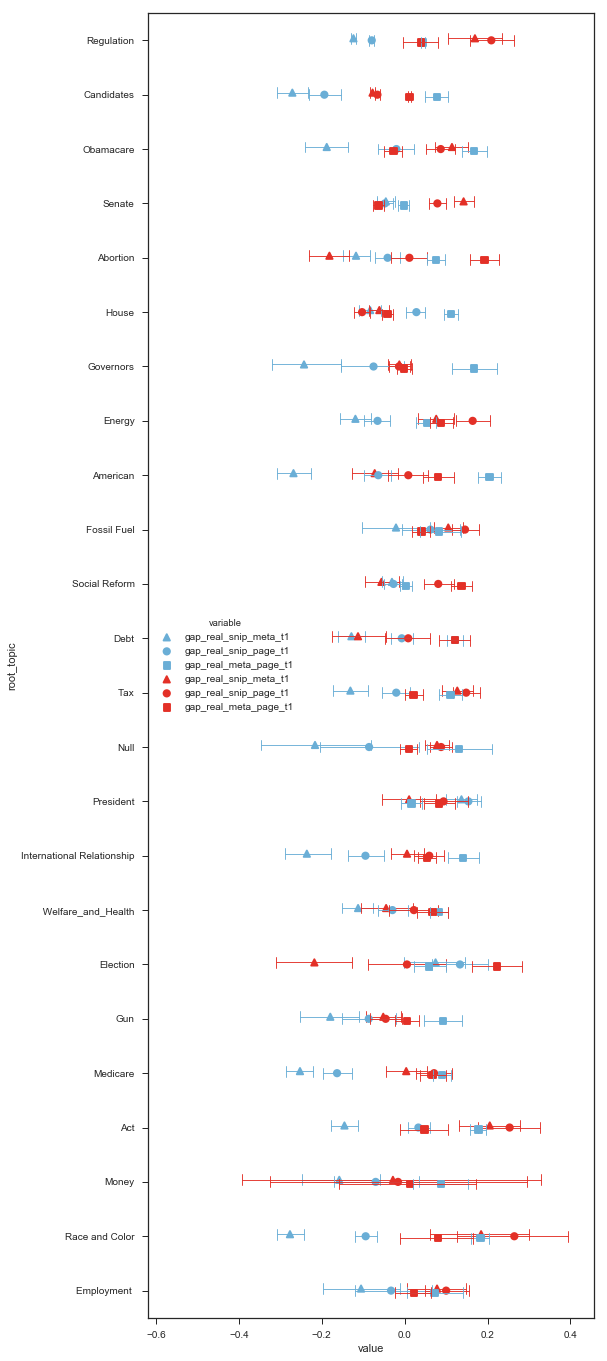

In [169]:
df_add_topic = pd.read_csv(path_add_party_and_topic)
#df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_real_snip_page_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
df_add_topic["gap_real_meta_page_t1"] = df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t1', 
                                                'gap_real_snip_page_t1',"gap_real_meta_page_t1"]) #,"gap_real_meta_page_t1"

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,24))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Blues_d', n_colors=1))

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'], palette=sns.color_palette('Reds_d', n_colors=1))




## 

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
df_topic_len:  177746
<class 'pandas.core.frame.DataFrame'>
Index(['party', 'root_topic', 'variable', 'value'], dtype='object')


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


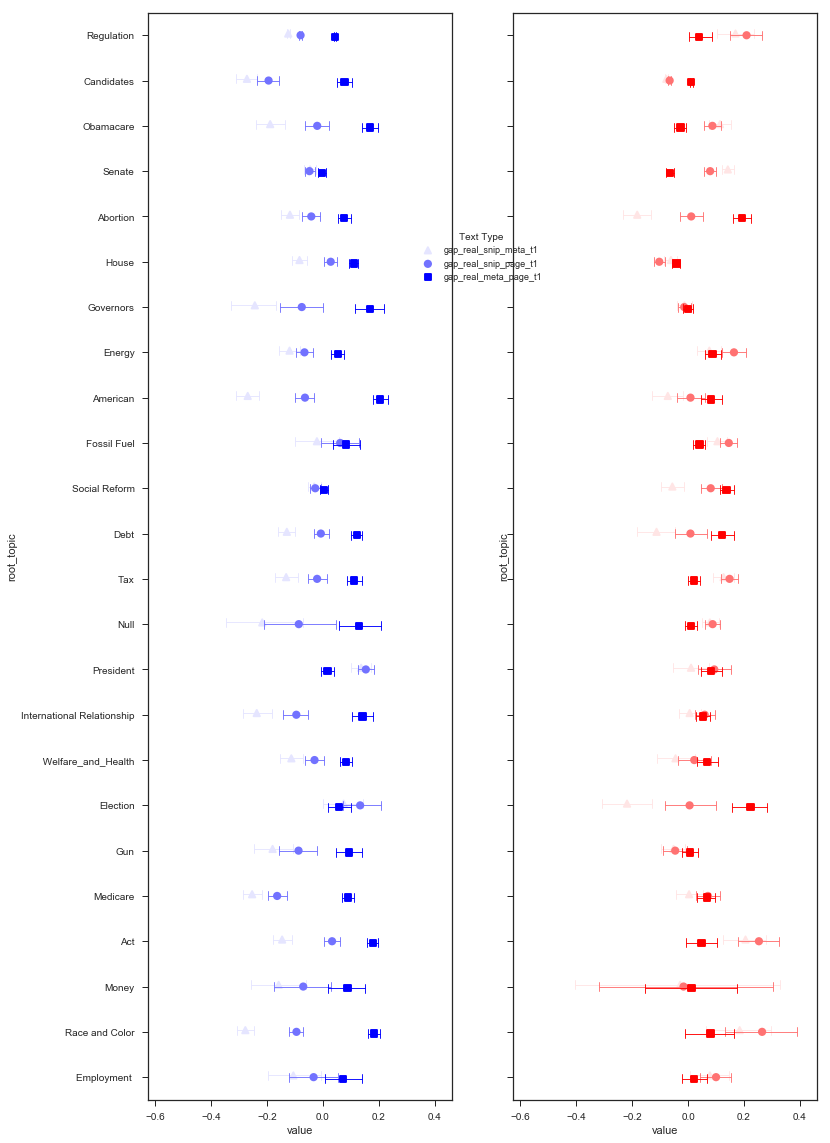

In [151]:
#df_add_topic = pd.read_csv(path_add_party_and_topic)
print(type(df_add_topic))
print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic = df_add_topic[(df_add_topic["visible_text_score_t1"]!=0) & (df_add_topic["snip_score_t1"]!=0)]
print("df_topic_len: ", len(df_add_topic))
print(type(df_add_topic))
#print(type(df_add_topic["snip_score_t1"].iloc[1]))
df_add_topic["gap_real_snip_meta_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["allmeta_score_t1"]
df_add_topic["gap_real_snip_page_t1"] = df_add_topic["snip_score_t1"]-df_add_topic["visible_text_score_t1"]
df_add_topic["gap_real_meta_page_t1"] = df_add_topic["allmeta_score_t1"]-df_add_topic["visible_text_score_t1"]

df_filtered_melt = df_add_topic.melt(id_vars=['party','root_topic'], 
                                    value_vars=['gap_real_snip_meta_t1', 
                                                'gap_real_snip_page_t1',"gap_real_meta_page_t1"])#

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
#print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(12,20))
sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax[0],
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax[1],
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

handle, label = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
ax[1].legend_.remove()

legend = fig.legend(handle, label, title='Text Type',
           loc=(0.5, 0.75), prop={'size': 9})
legend.get_title().set_fontsize('10') 






# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,24))
# sns.pointplot(x='value', y='root_topic', hue='variable', color='blue', ax=ax,
#               data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
#               linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

# sns.pointplot(x='value', y='root_topic', hue='variable', color='red', ax=ax,
#               data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
#               linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])



# df_filtered_melt = df_filtered.melt(id_vars=['party','root_group'], 
#                                     value_vars=['allmeta_score_t1', 
#                                                 'visible_text_score_t1', 
#                                                 'snip_score_t1'])

# root_order = ["LGBT","Gun", "Tax", "Obamacare", \
#   'Regulation', 'Senate', 'House', 'Governors']

# fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(12,4))
# sns.pointplot(x='value', y='root_group', hue='variable', color='blue', ax=ax[0],
#               data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
#               linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

# sns.pointplot(x='value', y='root_group', hue='variable', color='red', ax=ax[1],
#               data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
#               linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

# handle, label = ax[0].get_legend_handles_labels()
# ax[0].legend_.remove()
# ax[1].legend_.remove()

# legend = fig.legend(handle, label, title='Text Type',
#            loc=(0.5, 0.75), prop={'size': 9})
# legend.get_title().set_fontsize('10') 

Index(['party', 'root_group', 'variable', 'value'], dtype='object')
      party root_group          variable     value
0       hil      House  allmeta_score_t1 -0.770932
1       hil      House  allmeta_score_t1 -0.334696
2       hil      House  allmeta_score_t1 -0.581307
3       hil      House  allmeta_score_t1 -0.634374
4       hil      House  allmeta_score_t1 -0.358156
5       hil      House  allmeta_score_t1 -0.770932
6       hil      House  allmeta_score_t1 -0.334696
7       hil      House  allmeta_score_t1  0.070147
8       hil      House  allmeta_score_t1 -0.634374
9       hil      House  allmeta_score_t1 -0.075518
10      hil      House  allmeta_score_t1 -0.317720
11      hil      House  allmeta_score_t1  0.616812
12      hil      House  allmeta_score_t1 -0.740240
13      hil      House  allmeta_score_t1 -0.381146
14      hil      House  allmeta_score_t1 -0.072783
15      hil      House  allmeta_score_t1 -0.381146
16      hil      House  allmeta_score_t1 -0.634374
17      hil   

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


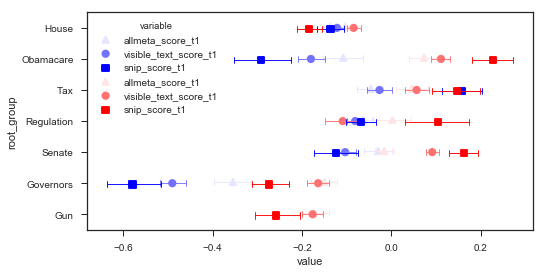

In [119]:
df_filtered_melt = df_filtered.melt(id_vars=['party','root_group'], 
                                    value_vars=['allmeta_score_t1', 
                                                'visible_text_score_t1', 
                                                'snip_score_t1'])

root_order = ["LGBT","Gun", "Tax", "Obamacare", \
  'Regulation', 'Senate', 'House', 'Governors']
print(df_filtered_melt.columns)
print(df_filtered_melt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.pointplot(x='value', y='root_group', hue='variable', color='blue', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

sns.pointplot(x='value', y='root_group', hue='variable', color='red', ax=ax,
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

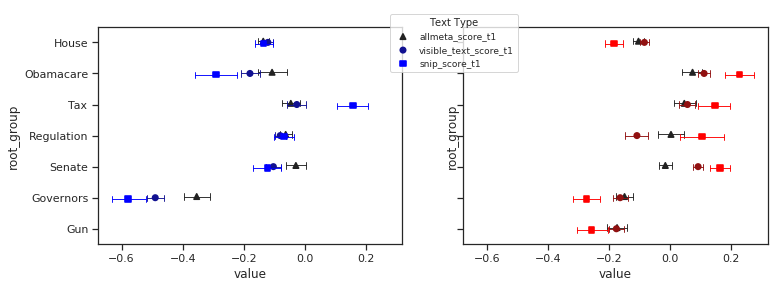

In [70]:
df_filtered_melt = df_filtered.melt(id_vars=['party','root_group'], 
                                    value_vars=['allmeta_score_t1', 
                                                'visible_text_score_t1', 
                                                'snip_score_t1'])

root_order = ["LGBT","Gun", "Tax", "Obamacare", \
  'Regulation', 'Senate', 'House', 'Governors']

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(12,4))
sns.pointplot(x='value', y='root_group', hue='variable', color='blue', ax=ax[0],
              data=df_filtered_melt[df_filtered_melt.party=='dem'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

sns.pointplot(x='value', y='root_group', hue='variable', color='red', ax=ax[1],
              data=df_filtered_melt[df_filtered_melt.party=='rep'], #hue_order=root_order,
              linestyles='', dodge=True, errwidth=0.9, capsize=0.2, scale=0.8, markers=['^','o','s'])

handle, label = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
ax[1].legend_.remove()

legend = fig.legend(handle, label, title='Text Type',
           loc=(0.5, 0.75), prop={'size': 9})
legend.get_title().set_fontsize('10') 